# Retail Rhythms: An ETL Journey Through MRTS Data

**Ken Walsh**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project analyzes economic trends in the retail and food services sector to understand sales patterns using the Monthly Retail Trade Survey (MRTS) data. By calculating percentage changes, examining rolling time windows, and evaluating sector-specific trends, the study reveals insights into revenue from 1992 to 2021. The trend analysis indicates that sporting goods stores have seen a substantial upward trajectory in spending, with a significant growth rate spike before 2020. In contrast, bookstores exhibit a declining trend, suggesting challenges due to digital shifts or changing consumer preferences. Seasonal patterns are evident, with quarter four consistently showing increased sales, and a notable downturn for all sectors during 2020, likely pandemic-related in 2020, and the economic crash in 2008/09. The project applies rolling window calculations to smooth data and reveal underlying patterns, crucial for predicting future spending. The findings suggest that sporting goods stores are likely to attract the most spending, while bookstores may attract the least, signaling potential strategic adjustments for these businesses.

[Back to top](#Index)


## 1. Introduction

**Deciphering Retail Dynamics: An ETL-to-Visualization Expedition**

The scope of this project was to translate raw data into meaningful visual representations that elucidate trends and explain data variations. This undertaking encompassed the complete ETL (Extract, Transform, Load) process, employing the U.S. Census Bureau’s Monthly Retail Trade Survey (MRTS) dataset. Initiated by transforming data with an Excel macro, the process continued with an automated Python script, converting each worksheet into individual CSV files.

These files then served as the foundation for the 'mrts' database, established through Python scripting. The installation script constructed the database, and integrated basic validation checks and error-handling to ensure data integrity.

Ensuring the data's accuracy was paramount, achieved by running a Python validation script, setting the stage for subsequent SQL queries to mine the database. These queries unveiled the complexities within the dataset, informing the subsequent visualization phase.

A suite of visualizations, including line trends, stacked columns, and bar charts, were crafted to identify sales trends, using techniques such as moving averages, in years of data. Dynamic rolling time plots illuminated shifts in consumer behavior and economic trends.

The most significant challenges occurred in database design, data injection, and intricacies in creating rolling time series. The end goal was not just to apply the technical skills garnered through coursework but to derive meaningful insights into the data. This report outlines the project, with code from the raw extraction of numbers to the production of the visual representations of the data.

[Back to top](#Index)

## 2. Extract-Transform-Load



[Back to top](#Index)

### 2.1 The ETL Process

Extract, Transform, Load (ETL) is a systematic process of gathering data from multiple sources, reshaping it into a structured format, and subsequently storing it in a targeted data repository. In this project, we're tasked with processing numerical data sourced from a U.S. government agency's provided in the form of an Excel Workbook. This data undergoes formatting transformations and is exported to an intermediary CSV (comma-separated values) file, before finally being integrated into a MySQL database using Python. The following outlines the steps undertaken for each phase of the ETL process.

### Extract

**Data Formatting in Excel:** Redundant data was removed from each of the worksheets in the Excel workbook using an Excel macro. Some data manipulation was carried out, only the "Not Adjusted" data was retained. Any data aggregation rows or columns were removed, as this aggregation can be achieved within the database.

**Exporting the Data:** A python script ("Export_CSVs - xlrd.py") was used to loop through the workbook and export each worksheet as a CSV file. The filename corresponded to the year of the data.

### Transform

**Data Cleaning:** A function, *sanitize_value*, cleanses the data of any non-numerical data contained within the CSVs in numerical columns.

**Data Structuring:** The database design addresses the issue of multiple NAIC Codes being associated with a single business type.

### Load

**Database Creation** The python script uses *yaml* for database connectivity and creates the *mrts* database in the MySQL Server if it does not already exist. It then creates the two tables used in the database, (*NAIC_Codes*, *Monthly_Data*).

![Database ER diagram (crow's foot).png](<attachment:Database ER diagram (crow's foot).png>)

**Data Insertion** The data from the CSV files is then injected into these tables with some data validation, and as each CSV file is processed a confirmation is printed. Upon completion, all changes are committed and the connections are closed.

In summary, the ETL process for the MRTS dataset involves extracting data from CSV files, transforming it by cleaning and restructuring to fit the database schema, and then loading it into the MySQL database, ensuring relationships and integrity are maintained.

[Back to top](#Index)

### 2.2 Data Exploration

**MRTS:** The MRTS (Monthly Retail Trade Survey) data is collected and published by the U.S. Census Bureau. This survey provides national estimates on monthly sales, end-of-month inventories, and other selected monthly sales estimates for retail businesses and food service establishments. [1]

**Objective:** The main goal of the MRTS is to provide a current measure of the health of the U.S. economy through key indicators, such as retail sales and inventories.

**Coverage:** It covers a variety of retail firms, including food services, drinking places, gasoline stations, and other types of general merchandise stores.

**Data**:
* **Sales Data:** Represents the total sales of establishments to the end-users. This doesn't include any inter-company sales or sales to other businesses.
* **Periodicity:** The data is collected monthly.

**Uses:** The collected data is used by government agencies, business firms, research organizations, and academia to study economic trends, forecast future demands, and make informed decisions.

**Data Provided:** The data for the project was provided in an excel workbook with twenty-eight worksheets. Each worksheets corresponded to a year of data, starting in 1992 through 2021. The data for 2021 was only a partial year, containing the first two months. There were two classifications of data, *Not-Adjusted* and *Adjusted* data.The *Adjusted* data has had seasonal fluctuations applied to it. Some of the numerical data had **(S)** in the cell, instead of numerical data, this relates to suppressed data for various reasons.


[Back to top](#Index)

### 2.3 Data Preparation

### Potential Issues with the MRTS Data

* There are two distinct sections: *Not Adjusted* and *Adjusted* sets of data. The *Not Adjusted* set was chosen for the project. So, the *Adjusted* data was removed.

* There are several rows that have NULL values for the NAICS code, these are aggregations of several businesses. These aggregations can be reproduced in the database, once the NAIC codes for each aggregation are known. This will be determined from the U.S. Census Bureau website.

* There are three rows with multiple NAICS codes for a single business type. Two of these rows with NAIC Codes entries (4411, 4412) and (442, 423) are aggregations of other rows and so were removed, as they could be replicated in the database if required. The other row containing (722513, 722514, 722515) as the entry was changed to use just (722513) as the NAIC Code. After consulting the U.S. Census Bureau information on this code, the decision was made that it was safe to make this change. This simplifies the database design considerably.

* Some rows and cells must be deleted to format the worksheets for easy exporting into CSVs, the Excel Macro will accomplish this step.

* Numerical columns with *(S)*, *(NA)*, or *NaNs* in them, will be replaced with zero using a function in the python installation script.

* Aggregation columns *CY CUM*, *PY CUM* from 2021, and all *Total* columns were removed as they are aggregations, and this can be accomplished within the database.

### Excel Macros

Several very simple excel macros were written/recorded to carry out the data manipulations to get the data into best format for export to CSVs.

**ProcessWorksheeets()** 

This macro completes the following tasks to transform the worksheet into a format for exporting to CSV and importation to MySQL:

* Deletes the top three rows of each worksheet. The requirement is to get a row of data headers for easier importation into the database. It loops through the workbook carrying out the deletions on each worksheet.

* Addresses the NAICS Code and Business cells being in the wrong place for the headers row. The macro copies them from Row 1 to Row 2 and then deletes Row 1 to create my header row. It does this for every worksheet.

* Deletes row 1 from the worksheet which is now an empty row. Thus, row 1 now has the header information we require.

* Deletes from the new row 2 to row 9 from the worksheet. Row 2 contains one entry "Not Adjusted", this entry is not required. The subsequent rows to row 9 (inclusive) are aggregate rows and are dealt with in the database.

* Deletes two rows where there are double NAIC codes in the NAIC codes cell for each row. These again are aggregation rows and can be replicated in the database. It deletes the new row 8 and row 3. 

* Resolves the issue with three NAIC codes for a single business type by removing two of the codes.

* Removes Column P from the worksheets, as in some of the worksheets this column contains spurious data.

* This step reduces the amount of data being uploaded to the database, it was decided to remove data aggregations as they can be generated within the database. So, the *CY Cum*, *PY Cum*, and *Total* columns, reproducable within the database, were removed. The macro locates the row indicating where the *Adjusted* data starts (this data is to be removed) and deletes it and all subsequent rows until it meets an the double empty row, when it terminates.

```
Sub ProcessWorksheets()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim rng As Range
    Dim rng1 As Range
    Dim colName As Variant
    Dim deleteFlag As Boolean
    Dim previousRowWasEmpty As Boolean
    
    ' Array of column names to search for deletion
    colName = Array("Total", "CY CUM", "PY CUM")

    ' Loop through each worksheet in the workbook
    For Each ws In ThisWorkbook.Worksheets

       ' Task 1: Deletes the first three rows
        ws.Rows("1:3").Delete Shift:=xlUp

       ' Task 2: Getting a row of header columns.
        ' Copy A1 and B1 to A2 and B2
        ws.Range("A1:B1").Copy Destination:=ws.Range("A2:B2")
        
       ' Task 3: Delete the empty row at the top of the worksheets
       ws.Rows(1).Delete Shift:=xlUp

       ' Task 4: Delete rows 2 through 9 on the active worksheet
       Set rng1 = ws.Rows("2:9")
       rng1.Delete Shift:=xlUp

       ' Task 5: Removes rows 3 and 8 - these are aggregate rows and are not required
       ' Delete row 8 first because deleting row 2 first would shift the rows up
       ws.Rows(8).Delete
       ' Now delete row 3
       ws.Rows(3).Delete

       ' Task 6: Resolve the issue with multiple NAICs for one business type in cell A57
       ws.Range("A57").Value = 722513
       
       ' Task 7: Delete Column P for spurious data
       ws.Columns("P").Delete

       ' Task 8: Delete unnecessary columns
        deleteFlag = False ' This flag will be set to true once "ADJUSTED(2)" is found
        previousRowWasEmpty = False ' This flag will be used to identify consecutive empty rows
        lastRow = ws.Cells(ws.Rows.Count, "B").End(xlUp).Row ' Find the last row with data in column B
        
        ' Task 8a: Delete columns with specified names
        For Each col In colName
            ' Search for the column name in the first row
            Set rng = ws.Rows(1).Find(What:=col, LookIn:=xlValues, LookAt:=xlWhole)
            ' If found, delete the entire column
            If Not rng Is Nothing Then rng.EntireColumn.Delete
        Next col
        
        ' Task 8b: Delete rows starting from "ADJUSTED(2)" until first double empty row
        ' Initialize index for the loop
        Dim i As Long
        For i = 1 To lastRow
            ' Check if the current cell in column B is "ADJUSTED(2)"
            If ws.Cells(i, 2).Value = "ADJUSTED(2)" Then
                deleteFlag = True ' Set the delete flag once "ADJUSTED(2)" is found
            End If
            
            ' When deleteFlag is True, start deleting rows
            If deleteFlag Then
                ' Check if current row is empty
                If IsEmpty(ws.Cells(i, 1)) And IsEmpty(ws.Cells(i, 2)) Then
                    ' If previous row was also empty, we've found two consecutive empty rows
                    If previousRowWasEmpty Then Exit For ' Exit the loop if two consecutive empty rows are found
                    previousRowWasEmpty = True ' Set the flag if the current row is empty
                Else
                    ' If current row is not empty, reset the flag
                    previousRowWasEmpty = False
                End If
                
                ' Delete the current row and decrement the counter to adjust for the shift in rows
                ws.Rows(i).Delete
                i = i - 1
                lastRow = lastRow - 1 ' Adjust lastRow count since we've deleted a row
            End If
        Next i
    Next ws
End Sub
```

In summary, this macro prepares the data for export to the CSV format for importation into the database.

### Creating the CSVs

To create the CSVs, a python script was written, as each worksheet in the Excel workbook must be exported separately. Each CSV that is generated is given a name corresponding to the year the data comes from. For this script, the *xlrd* python library was used for manipulating the excel workbook.

```
import os
import csv
import xlrd
import easygui

# Prompt the user to select the Excel workbook using easygui
excel_file = easygui.fileopenbox(title="Select an Excel workbook", filetypes=['*.xls', '*.xlsx'])

# Check if a file was selected
if not excel_file:
    print("No Excel file was selected. Exiting...")
    exit()

# Load the Excel workbook
workbook = xlrd.open_workbook(excel_file)

# Ensure the "CSVs" folder exists in the same directory as the Excel file
csv_folder = os.path.join(os.path.dirname(excel_file), "CSVs")
if not os.path.exists(csv_folder):
    os.mkdir(csv_folder)

# Iterate over each worksheet and export to CSV
for sheet_name in workbook.sheet_names():
    sheet = workbook.sheet_by_name(sheet_name)
    csv_filename = os.path.join(csv_folder, sheet_name + ".csv")

    with open(csv_filename, 'w', newline="", encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        for row_num in range(sheet.nrows):
            writer.writerow(sheet.row_values(row_num))

print(f"All worksheets from '{excel_file}' have been exported to the 'CSVs' folder.")
```

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python offers many methods for reading and handling CSV (Comma-Separated Values) files. The code uses *pandas*, *os* and *easygui* to create a gui for user input to select the *yaml* file, and then the folder containing the CSVs to import as part of the installation script.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The headers and first six rows of data from the 2020 MRTS worksheet was used to create a csv file called test. An image of the test.csv file is displayed below.

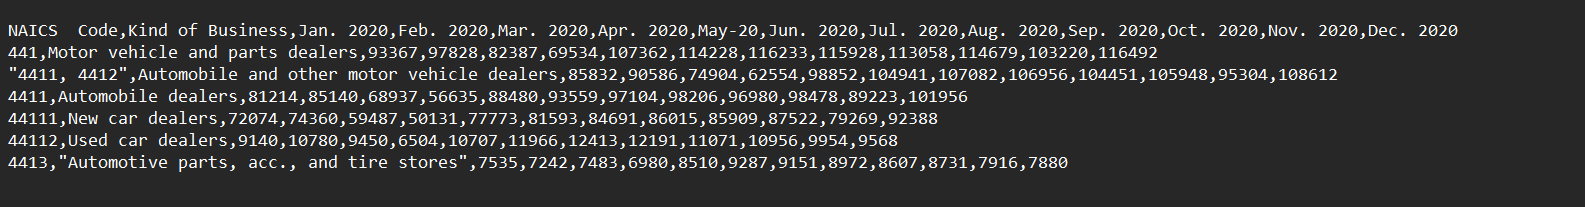

The decision to use actual data permitted use of the code in the final installation script.

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

```
import easygui
import pandas as pd
import os

# Prompt user to select a directory
folder_path = easygui.diropenbox(title="Select a folder containing CSV files")

if folder_path:
    # Get list of all CSV files in the selected directory
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Check if there are any CSV files in the directory
    if csv_files:
        for csv_file in csv_files:
            full_path = os.path.join(folder_path, csv_file)
            df = pd.read_csv(full_path)
            print(f"Contents of {csv_file}:\n")
            print(df.head(6))  # Print first 6 rows of the dataframe
            print("\n" + "-"*50 + "\n")  # Add a separator for clarity
    else:
        print("No CSV files found in the selected directory!")
else:
    print("No folder was selected!")
```

**User Interface with easygui:**
Prompts the user to select a directory with an interactive GUI experience without the need to input directory paths manually or hardcode them.

**Directory Handling with os:**
The os module is used to interact with the operating system. Here, you've used it to list all files in the chosen directory and filter out CSV files.

**Data Reading with pandas:**
The pandas library is used to read the CSV files. The read_csv() function converts the content of a CSV file into a dataframe.

**Displaying the Data:**
Once the data is loaded into a dataframe, the first six rows of each file is printed to the console. This gives a quick glance at the content to the user.

**Error Handling and Feedback:**
The code provides feedback if no CSV files are found or if the user doesn't select a directory.

[Back to top](#Index)

### 2.5 Writing an Installation Script

```
import mysql.connector
import easygui
import pandas as pd
import os
import yaml

# Prompt user to select the .yaml configuration file
config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

# Load MySQL configuration from the selected yaml file
with open(config_path, 'r') as f:
    db = yaml.safe_load(f)

# Extracting connection details from the configuration file
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'auth_plugin': 'mysql_native_password'
}

# Connect to MySQL to check if the database exists
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Create the 'mrts' database if it doesn't exist
cursor.execute("CREATE DATABASE IF NOT EXISTS mrts")

# Close the initial connection
cursor.close()
cnx.close()

# Specify the 'mrts' database for subsequent connections
config['database'] = 'mrts'
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Create necessary tables if they don't exist
# Create NAIC_Codes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS NAIC_Codes (
    NAIC_Code_ID INT AUTO_INCREMENT PRIMARY KEY,
    NAIC_Code INT UNIQUE,
    Business_Type VARCHAR(255)
)
""")

# Create Monthly_Data table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Monthly_Data (
    Data_ID INT AUTO_INCREMENT PRIMARY KEY,
    NAIC_Code_ID INT,
    Year INT,
    Month INT CHECK (Month BETWEEN 1 AND 12),
    Value DECIMAL(10,2),
    FOREIGN KEY (NAIC_Code_ID) REFERENCES NAIC_Codes(NAIC_Code_ID)
)
""")

# Prompt user to select directory containing CSV files
folder_path = easygui.diropenbox(title="Select a folder containing CSV files")

# Helper functions for database interactions
def get_naic_code_id(cursor, code):
    cursor.execute("SELECT NAIC_Code_ID FROM NAIC_Codes WHERE NAIC_Code = %s", (code,))
    result = cursor.fetchone()
    return result[0] if result else None

def insert_naic_code_and_type(cursor, code, business_type):
    if pd.isna(code) or code == 'nan':
        return None
    cursor.execute("INSERT INTO NAIC_Codes (NAIC_Code, Business_Type) VALUES (%s, %s) ON DUPLICATE KEY UPDATE NAIC_Code = VALUES(NAIC_Code), Business_Type = VALUES(Business_Type)", (code, business_type))
    return get_naic_code_id(cursor, code)

def sanitize_value(value):
    if value in ['(NA)', '(S)'] or pd.isna(value):
        return '0'
    return value

# Check if a folder path was selected
if folder_path:
    # Extract all CSV files from the selected directory
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for csv_file in csv_files:
        full_path = os.path.join(folder_path, csv_file)

        # Extract year from the filename
        try:
            year = int(csv_file.split('_')[-1].replace('.csv', ''))
        except ValueError:
            print(f"Skipped {csv_file} due to unexpected file naming format.")
            continue

        data = pd.read_csv(full_path)

        # Populate the database using CSV data
        for index, row in data.iterrows():
            naic_code = row[0]
            business_type = row[1]
            naic_code_id = insert_naic_code_and_type(cursor, naic_code, business_type)

            for month, value in enumerate(row[2:], 1):
                cursor.execute("INSERT INTO Monthly_Data (NAIC_Code_ID, Year, Month, Value) VALUES (%s, %s, %s, %s)", (naic_code_id, year, month, sanitize_value(value)))

            print(f"Inserted data from {csv_file}")

# Commit changes and close connection
cnx.commit()
cursor.close()
cnx.close()

print("Database and tables have been created and populated successfully!")
```

This is the installation python code for creating and populating the MRTS database for this project. The following is a breakdown of the different sections and a brief description of each.

**Importing necessary modules:**

1. **mysql.connector:** For connecting to and working with a MySQL database.
2. **easygui:** Provides easy-to-use GUI dialogs.
3. **pandas:** Data analysis library, mainly used here for handling CSV files.
4. **os:** Allows interaction with the operating system (e.g., listing files).
5. **yaml:** Used for reading YAML configuration files.

**Selecting the configuration file:**

The user is prompted to select a .yaml file which contains the configuration for connecting to the MySQL database.

**Loading database configuration:**

The selected YAML file is read and the database connection details are extracted.

**Connecting to MySQL:**

The script connects to MySQL using the loaded configuration to check if the desired database (mrts) exists. If it doesn't exist, it's created.

**Defining the database structure:**

The script reconnects, this time specifying the 'mrts' database. Two tables (NAIC_Codes, and Monthly_Data) are defined and created if they don't exist already.

**Selecting the data source:**

The user is prompted to select a folder containing CSV files which will be used to populate the database.

**Helper functions for database interactions:**

Several helper functions are defined to aid in inserting and retrieving data from the database. This includes get_naic_code_id,  insert_naic_code, and sanitize_value.

**Reading and inserting data from the CSV files:**

* The script lists all CSV files in the chosen directory.
* For each CSV file:
* The year is extracted from the filename.
* The CSV file is loaded into a pandas DataFrame.
* Each row of the DataFrame is processed to extract the NAIC code, business type, and monthly data.
* The NAIC code and business type are inserted into the *NAIC_Codes* table.
* The monthly data is inserted into the *Monthly_Data* table.

**Closing the connection:**

After processing all CSV files, the database connection is committed to save changes and then closed.

**Final message:**

A message is printed indicating that the database and tables have been successfully created and populated.



### Data Validation

```
import mysql.connector
import easygui
import yaml

# Prompt user to select the .yaml configuration file
config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

# Load MySQL configuration from the selected yaml file
with open(config_path, 'r') as f:
    db = yaml.safe_load(f)

# Extracting connection details from the configuration file
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': 'mrts',
    'auth_plugin': 'mysql_native_password'
}

# Connecting to the 'mrts' database
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Validation 1: Count of NAIC Codes
cursor.execute("SELECT COUNT(*) FROM NAIC_Codes")
naic_count = cursor.fetchone()[0]
print(f"Count of NAIC Codes: {naic_count}")
print(f"Count of NAIC Codes in Excel Workbook: 56")

# Validation 2: Monthly Data without Corresponding NAIC Code
cursor.execute("""
SELECT COUNT(*)
FROM Monthly_Data
WHERE NAIC_Code_ID NOT IN (SELECT NAIC_Code_ID FROM NAIC_Codes)
""")
orphan_data_count = cursor.fetchone()[0]
print(f"\nData entries without a corresponding NAIC Code: {orphan_data_count}")

# Validation 3: Monthly Data Range
cursor.execute("""
SELECT COUNT(*)
FROM Monthly_Data
WHERE month NOT BETWEEN 1 AND 12
""")
invalid_month_count = cursor.fetchone()[0]
print(f"\nData entries with an invalid month value: {invalid_month_count}")

# Validation 4: Check for Missing Data in the Monthly_Data Table
cursor.execute("""
SELECT Data_ID, NAIC_Code_ID, year, month, value
FROM Monthly_Data
WHERE NAIC_Code_ID IS NULL OR year IS NULL OR month IS NULL OR value IS NULL
""")
missing_data = cursor.fetchall()
print(f"\nData entries with missing values: {len(missing_data)}")
for md in missing_data:
    print(f"Data_ID: {md[0]}, NAIC_Code_ID: {md[1]}, year: {md[2]}, month: {md[3]}, value: {md[4]}")

# Validation 5: Check for Non-numerical Values in the Monthly_Data Table
cursor.execute("""
SELECT Data_ID, value
FROM Monthly_Data
WHERE value REGEXP '[^0-9.]'
""")
non_numerical_values = cursor.fetchall()
print(f"\nData entries with non-numerical values: {len(non_numerical_values)}")
for nnv in non_numerical_values:
    print(f"Data_ID: {nnv[0]}, value: {nnv[1]}")

# Close the database connection
cursor.close()
cnx.close()
```

The validation code examines the database to ensure the data is good. The installation script attempts to validate and impute data as it is being inserted. The validations carried out are:

* Validation 1: Count of NAIC Codes - checks the number of NAIC Codes between the CSVs and the database.
* Validation 2: Monthly Data without Corresponding NAIC Code - checks that no entries in the data table have a blank NAIC Code.
* Validation 3: Monthly Data Range - checks that there are only twleve months per year.
* Validation 4: Check for Missing Data in the Monthly_Data Table - checks for any missing/blank entries.
* Validation 5: Check for Non-numerical Values in the Monthly_Data Table - checks for any non-numerical entries in the data table.

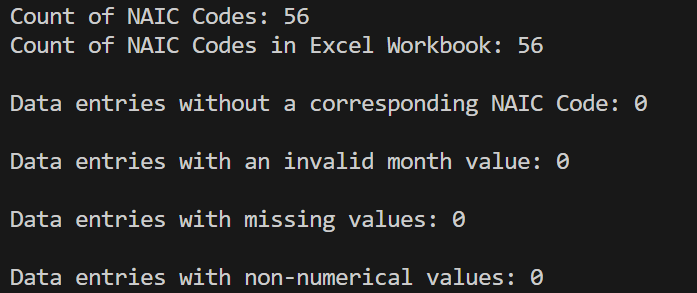



[Back to top](#Index)

## 3. Analysis and Visualization

When starting the analysis and visualization phase of the project, a realization occurred that the aggregatins from the workbook had not been incorporated into the database design. This necessiatated additional tables to facilitate these aggregations. Two new tables were added to the database, *naic_groups* and *naic_group_mapping*. The *naic_groups* table consists of:

**Group_ID:** A unique auto-incrementing integer, primary key.
**Group_Name:** A unique string representing the name of the group, which can be associated with various NAIC codes.

The group names correspond to the following list:

* Retail and food services sales, total
* Retail sales and food services excl motor vehicle and parts
* Retail sales and food services excl gasoline stations
* Retail sales and food services excl motor vehicle and parts and gasoline stations
* Retail sales, total
* Retail sales, total (excl. motor vehicle and parts dealers)
* GAFO

These groups are aggregations of NAIC Codes and a decision was made to not import these data but to create them within the database.The second table creates a mapping between the group and the group members, this *naic_group_mapping* table contains:

**Mapping_ID:** A unique auto-incrementing integer, primary key.
**Group_ID:** An integer that references Group_ID in the NAIC_Groups table, establishing a foreign key relationship.
**NAIC_Code:** An integer that references NAIC_Code in the NAIC_Codes table, also establishing a foreign key relationship.

The new database relationship diagram looks like this:

![MRTS Database.png](<attachment:MRTS Database.png>)

The code to create the additional tables and insert the data follows:

```
import mysql.connector
import easygui
import pandas as pd
import os
import yaml

# Prompt user to select the .yaml configuration file
config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

# Load MySQL configuration from the selected yaml file
try:
    with open(config_path, 'r') as f:
        db = yaml.safe_load(f)

    # Validate required fields in the configuration file
    required_fields = ['user', 'pwrd', 'host']
    for field in required_fields:
        if field not in db:
            raise ValueError(f"Missing '{field}' in the configuration file.")

except Exception as e:
    print(f"Error loading MySQL configuration: {str(e)}")
    exit(1)

# Extracting connection details from the configuration file
config = {
    'user': db['user'],
    'password': db['pwrd'],
    'host': db['host'],
    'auth_plugin': 'mysql_native_password'
}

# Connect to MySQL to check if the database exists
try:
    cnx = mysql.connector.connect(**config)
    cursor = cnx.cursor()

    # Create the 'mrts' database if it doesn't exist
    cursor.execute("CREATE DATABASE IF NOT EXISTS mrts")

except mysql.connector.Error as err:
    print(f"MySQL error: {err}")
    if 'cnx' in locals() and cnx.is_connected():
        cursor.close()
        cnx.close()
    exit(1)

# Close the initial connection
cursor.close()
cnx.close()

# Specify the 'mrts' database for subsequent connections
config['database'] = 'mrts'
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# SQL Table Creation and Data Insertion
try:
    # Create a table to map group names to NAIC Codes
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS NAIC_Groups (
        Group_ID INT AUTO_INCREMENT PRIMARY KEY,
        Group_Name VARCHAR(255) UNIQUE
    )
    """)

    # Create a table to store the relationships between groups and NAIC Codes
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS NAIC_Group_Mapping (
        Mapping_ID INT AUTO_INCREMENT PRIMARY KEY,
        Group_ID INT,
        NAIC_Code INT,
        FOREIGN KEY (Group_ID) REFERENCES NAIC_Groups(Group_ID),
        FOREIGN KEY (NAIC_Code) REFERENCES NAIC_Codes(NAIC_Code)
    )
    """)

    # Insert data for the "Retail and Food Services Category" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail and Food Services')")

    # Insert NAIC Codes associated with the "Retail and Food Services Category" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(1, '441'), (1, '442'), (1, '443'), (1, '444'), (1, '445'), (1, '446'),
                         (1, '447'), (1, '448'), (1, '451'), (1, '452'), (1, '453'), (1, '454'),
                         (1, '722')])

    # Insert data for the "Retail sales and food services excl motor vehicle and parts" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail sales and food services excl motor vehicle and parts')")

    # Insert NAIC Codes associated with the "Retail sales and food services excl motor vehicle and parts" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(2, '442'), (2, '443'), (2, '444'), (2, '445'), (2, '446'), (2, '447'),
                         (2, '448'), (2, '451'), (2, '452'), (2, '453'), (2, '454'), (2, '722')])

    # Insert data for the "Retail sales and food services excl gasoline stations" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail sales and food services excl gasoline stations')")

    # Insert NAIC Codes associated with the "Retail sales and food services excl gasoline stations" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(3, '441'), (3, '442'), (3, '443'), (3, '444'), (3, '445'), (3, '446'),
                         (3, '448'), (3, '451'), (3, '452'), (3, '453'), (3, '454'), (3, '722')])

    # Insert data for the "Retail sales and food services excl motor vehicle and parts and gasoline stations" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail sales and food services excl motor vehicle and parts and gasoline stations')")

    # Insert NAIC Codes associated with the "Retail sales and food services excl motor vehicle and parts and gasoline stations" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(4, '442'), (4, '443'), (4, '444'), (4, '445'), (4, '446'), (4, '448'),
                         (4, '451'), (4, '452'), (4, '453'), (4, '454'), (4, '722')])

    # Insert data for the "Retail sales" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail sales')")

    # Insert NAIC Codes associated with the "Retail sales" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(5, '441'), (5, '442'), (5, '443'), (5, '444'), (5, '445'), (5, '446'),
                         (5, '447'), (5, '448'), (5, '451'), (5, '452'), (5, '453'), (5, '454')])

    # Insert data for the "Retail sales (excl. motor vehicle and parts dealers)" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('Retail sales (excl. motor vehicle and parts dealers)')")

    # Insert NAIC Codes associated with the "Retail sales (excl. motor vehicle and parts dealers)" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(6, '442'), (6, '443'), (6, '444'), (6, '445'), (6, '446'), (6, '447'),
                         (6, '448'), (6, '451'), (6, '452'), (6, '453'), (6, '454')])

    # Insert data for the "GAFO(1)" group
    cursor.execute("INSERT INTO NAIC_Groups (Group_Name) VALUES ('GAFO(1)')")

    # Insert NAIC Codes associated with the "GAFO(1)" group
    cursor.executemany("INSERT INTO NAIC_Group_Mapping (Group_ID, NAIC_Code) VALUES (%s, %s)",
                        [(7, '442'), (7, '443'), (7, '448'), (7, '451'), (7, '452'), (7, '4532')])

    # Commit changes and close connection
    cnx.commit()
    cursor.close()
    cnx.close()

    print("Database and tables have been created and populated successfully!")

except mysql.connector.Error as err:
    print(f"MySQL error: {err}")
    if 'cnx' in locals() and cnx.is_connected():
        cursor.close()
        cnx.close()
    exit(1)
```
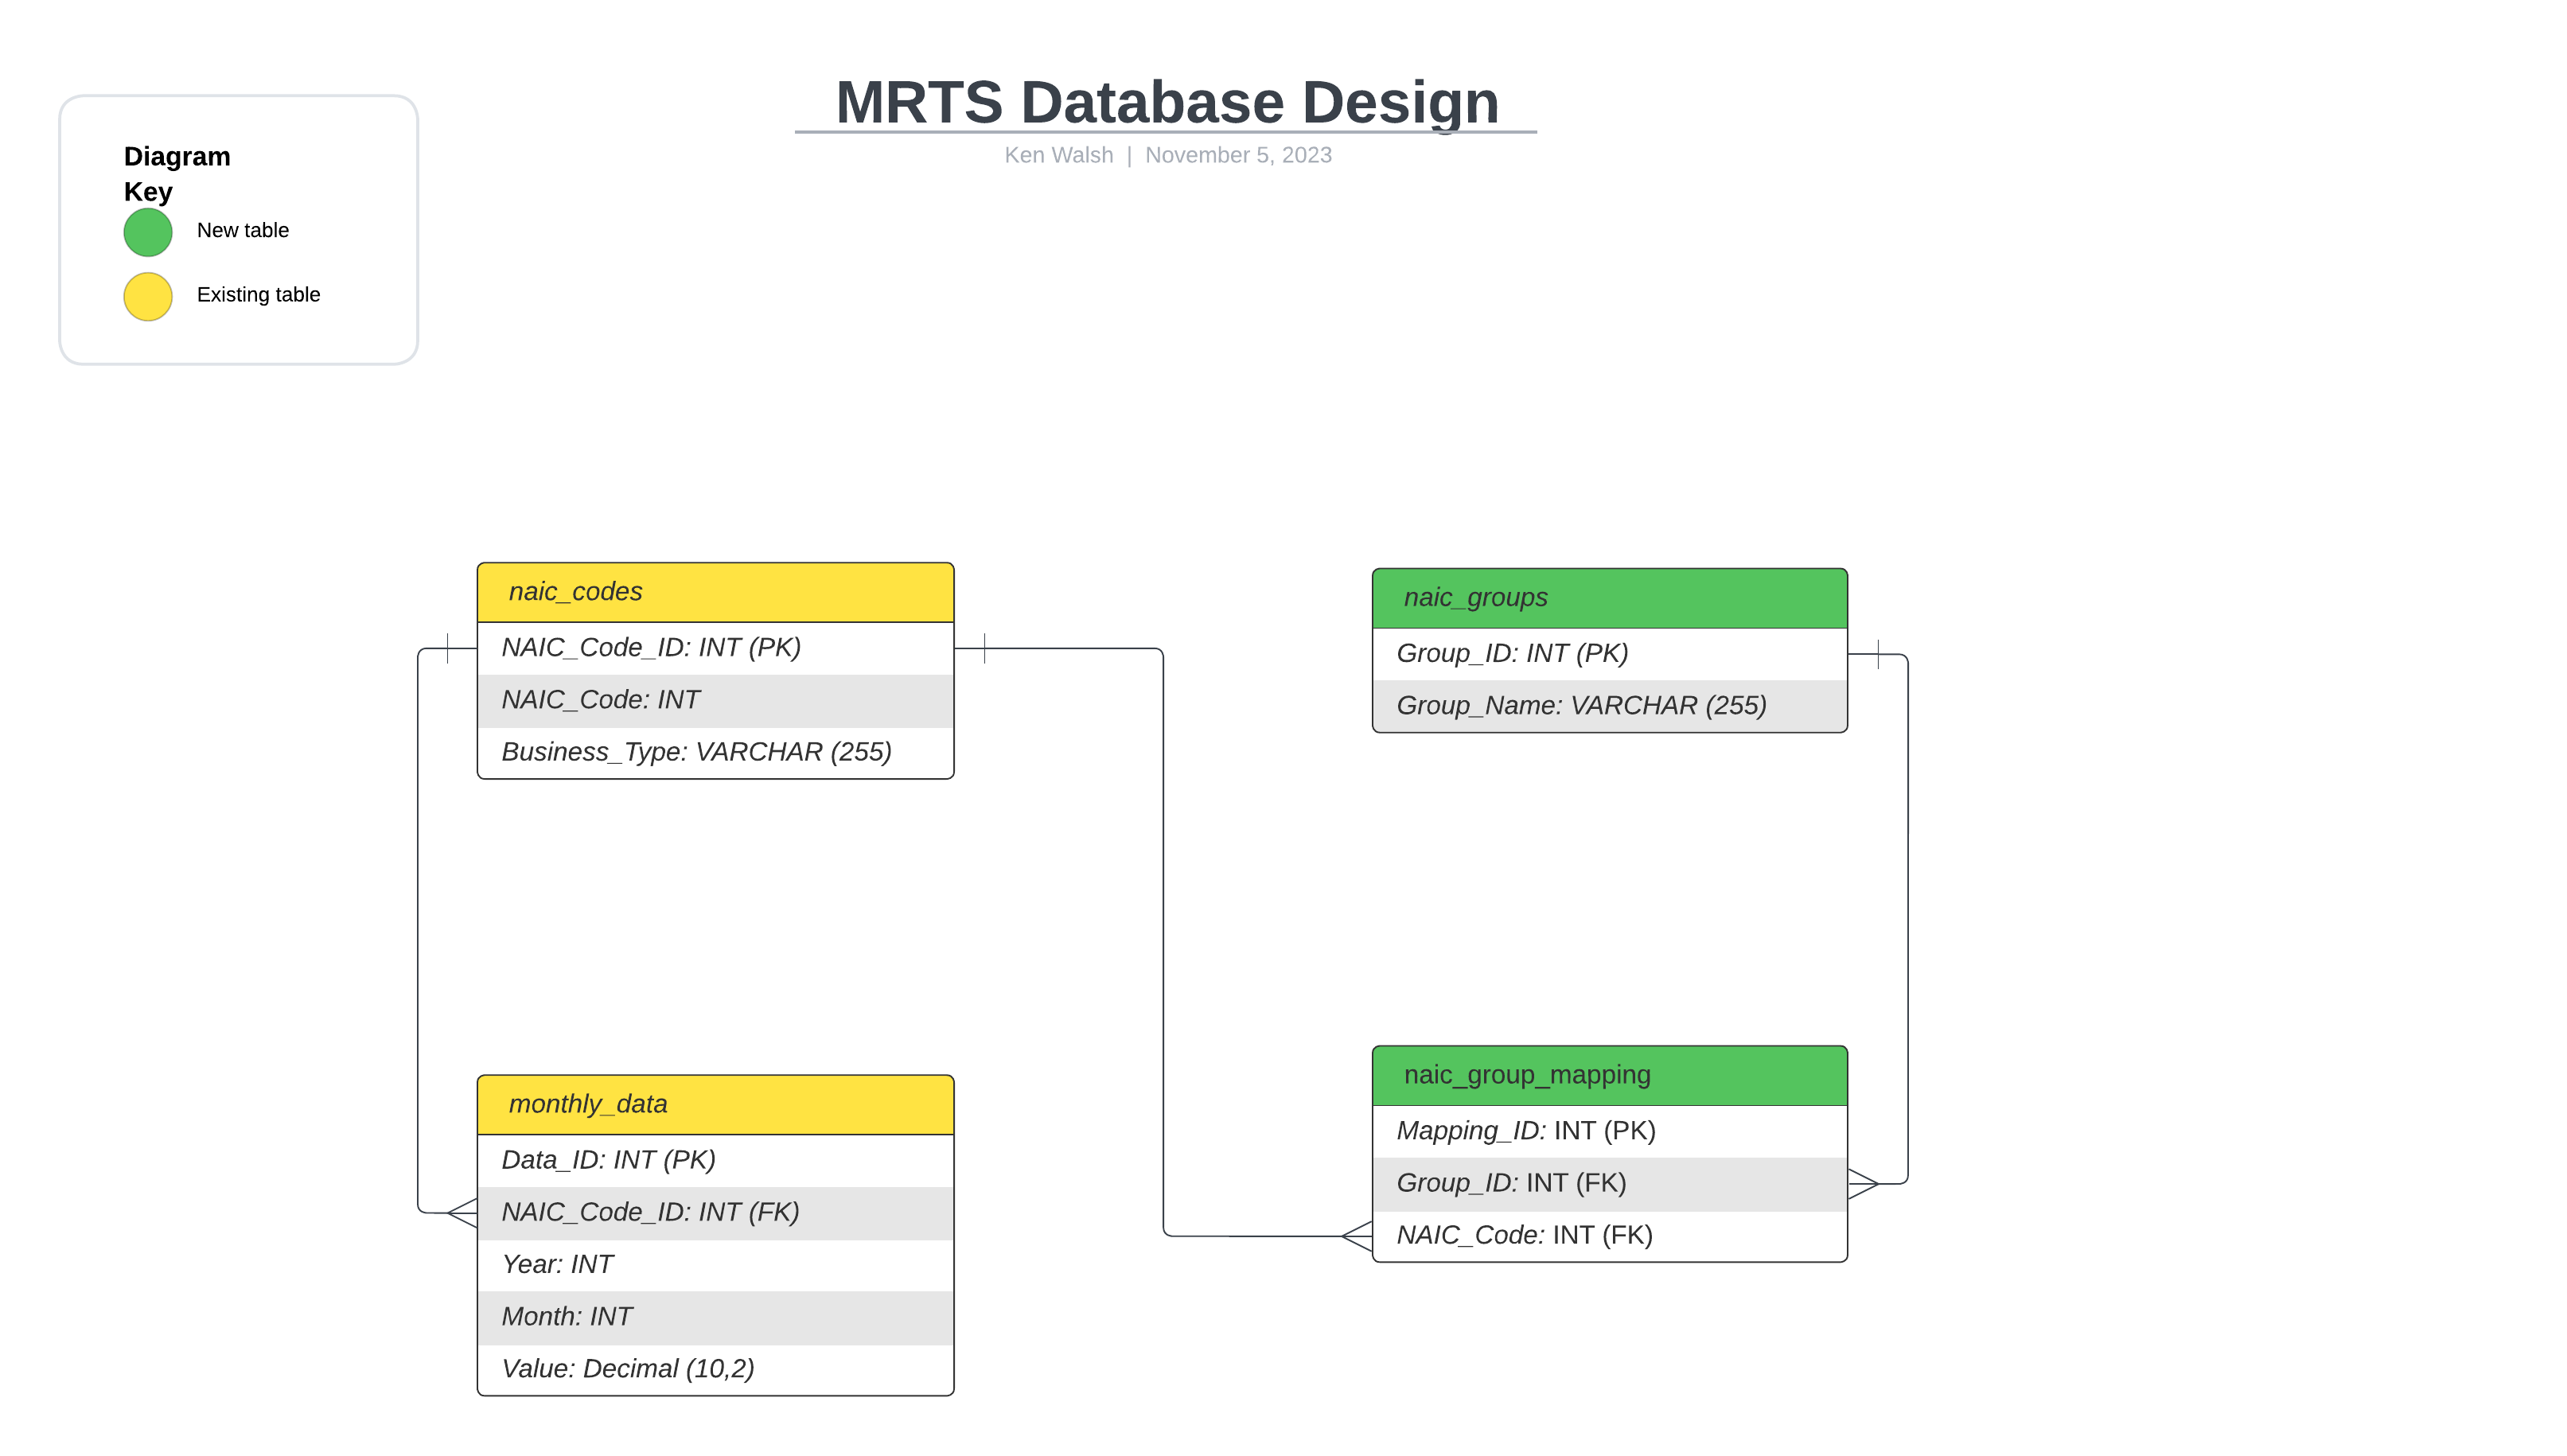

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbench

**SQL Script 1:**

```
SELECT
    MD.Year AS Year,
    DATE_FORMAT(CONCAT(MD.Year, '-', MD.Month, '-01'), '%b') AS Month,
    SUM(MD.Value) AS TotalSales
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
JOIN
    NAIC_Group_Mapping NGM ON NC.NAIC_Code = NGM.NAIC_Code
JOIN
    NAIC_Groups NG ON NGM.Group_ID = NG.Group_ID
WHERE
    NG.Group_Name = 'Retail and food services'
GROUP BY
    MD.Year, MD.Month
ORDER BY
    MD.Year, MD.Month;
```

This first script is designed to report the total sales for each month across all years for the 'Retail and food services' group within the MRTS data. This will be used in future questions, however it is an excellent test of the data injection process, the database design, and the data can be validated against the original MRTS data in the excel workbook. The totals for this group "Retail and Food Services" and the other groups in the *naic_groups* table were compared to multiple years totals from the workbook and were correct. Below is a sample of the results table in MySQL Workbench:

![1st SQL Query Example Results.png](<attachment:1st SQL Query Example Results.png>)

**SQL Script 2:**

```
SELECT
    NC.NAIC_Code,
    SUM(MD.Value) AS TotalSales
FROM
    NAIC_Codes AS NC
INNER JOIN
    Monthly_Data AS MD ON NC.NAIC_Code_ID = MD.NAIC_Code_ID
GROUP BY
    NC.NAIC_Code
ORDER BY
    TotalSales DESC;
```

This SQL script is structured to calculate the total sales per NAIC code, based on the data available in the *Monthly_Data* and *NAIC_Codes* tables. It then orders the results in descending order to show which NAIC code has the highest sales. A sample of the returned data is displayed below:

![2nd SQL Query Example Results.png](<attachment:2nd SQL Query Example Results.png>)

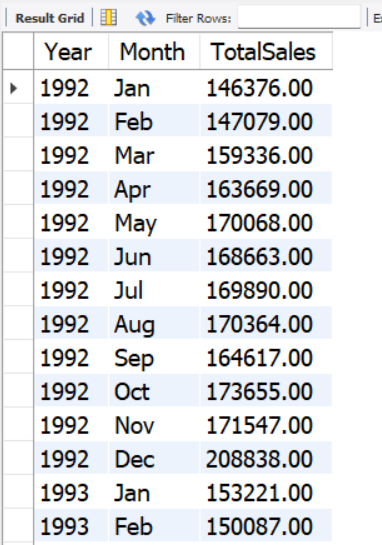
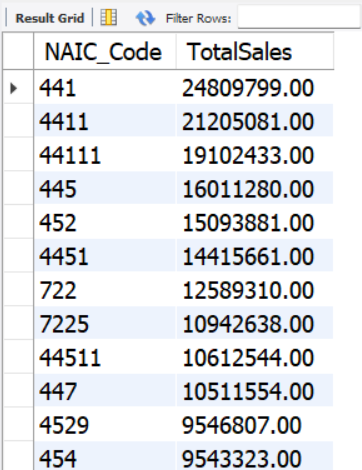

[Back to top](#Index)

### 3.2 Running Queries From Python

Both of the SQL scripts were incorporated into a python script so the plots for these queries could be displayed. The following is the plot for the first SQL script:

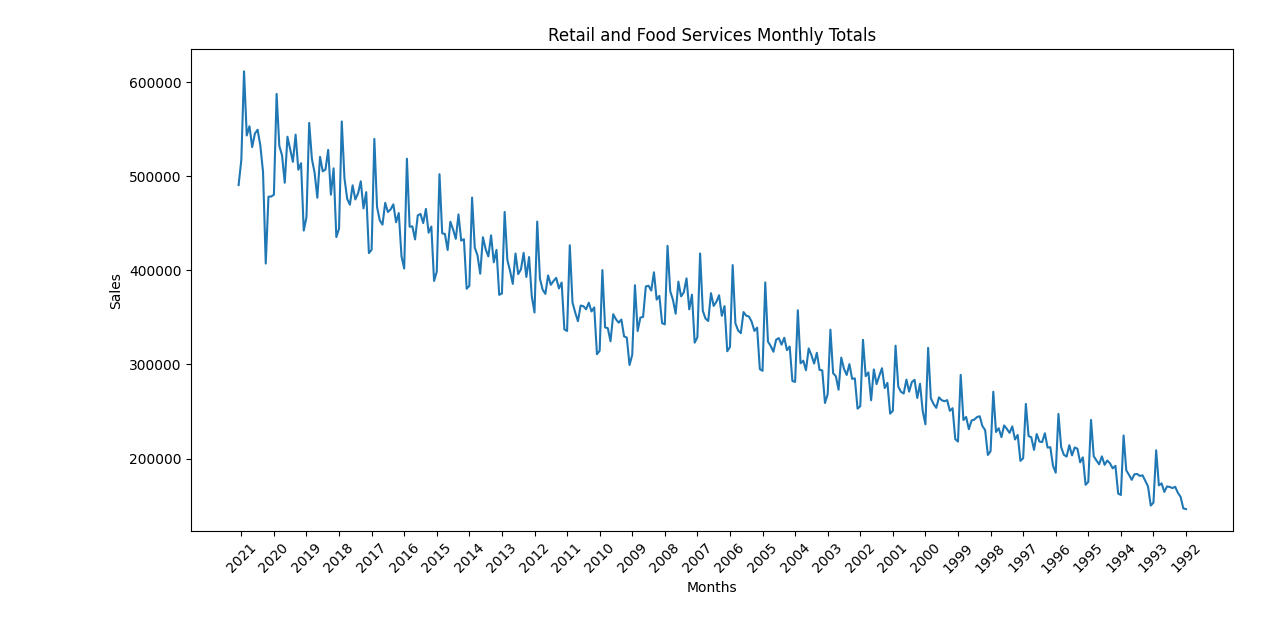

The plot produced by *matplotlib* was:

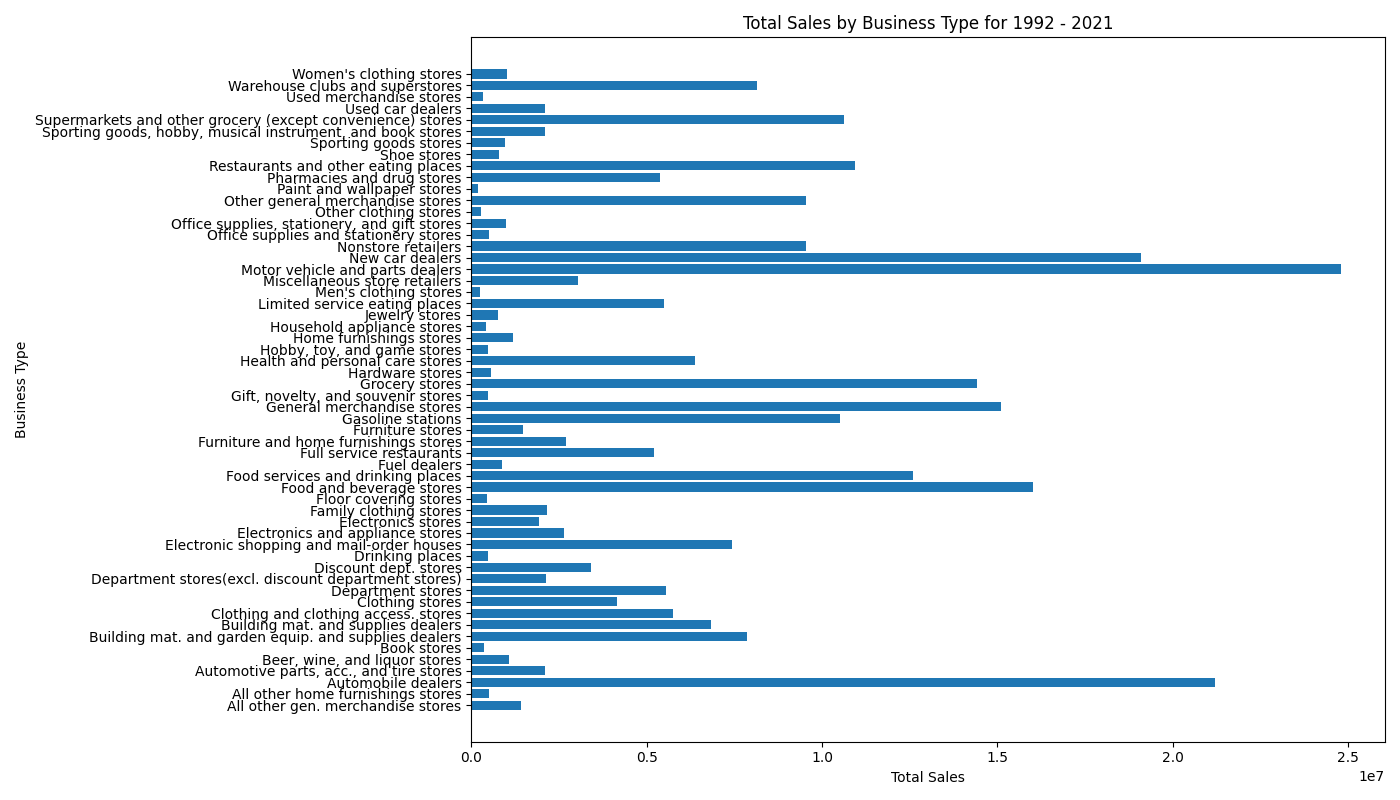

The code to produce both of these queries and plots is detailed below:

```
import mysql.connector
import easygui
import yaml
import matplotlib.pyplot as plt

def load_mysql_config(config_path):
    try:
        with open(config_path, 'r') as f:
            db = yaml.safe_load(f)
            required_keys = ['user', 'pwrd', 'host']
            
            if all(key in db for key in required_keys):
                return {
                    'user': db['user'],
                    'password': db['pwrd'],
                    'host': db['host'],
                    'auth_plugin': 'mysql_native_password',
                    'database': 'mrts'  # Specify the 'mrts' database here
                }
            else:
                raise ValueError("Invalid MySQL configuration file. Missing required keys.")
    except FileNotFoundError:
        raise FileNotFoundError("Configuration file not found.")
    except yaml.YAMLError:
        raise ValueError("Invalid YAML format in the configuration file.")

def check_database_existence(cursor):
    cursor.execute("SHOW DATABASES LIKE 'mrts'")
    return cursor.fetchone() is not None

def main():
    try:
        # Prompt user to select the .yaml configuration file
        config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])
        
        # Load MySQL configuration from the selected yaml file
        config = load_mysql_config(config_path)

        # Connect to MySQL to check if the database exists
        cnx = mysql.connector.connect(**config)
        cursor = cnx.cursor()

        if not check_database_existence(cursor):
            # Database does not exist
            print("Database does not exist, please run the installation script")
        else:
            # Database exists, proceed with the rest of the script

            # Run SQL Statement for time series plot
            sql = """
            SELECT 
                CONCAT(Monthly_Data.Year, '-', LPAD(Monthly_Data.Month, 2, '0'), '-01') AS date_formatted, 
                CAST(SUM(Monthly_Data.Value) AS UNSIGNED) AS sales
            FROM 
                Monthly_Data 
            JOIN 
                NAIC_Codes ON Monthly_Data.NAIC_Code_ID = NAIC_Codes.NAIC_Code_ID
            JOIN
                NAIC_Group_Mapping ON NAIC_Codes.NAIC_Code = NAIC_Group_Mapping.NAIC_Code
            JOIN
                NAIC_Groups ON NAIC_Group_Mapping.Group_ID = NAIC_Groups.Group_ID
            WHERE 
                NAIC_Groups.Group_Name = 'Retail and Food Services'
            GROUP BY 
                Monthly_Data.Year, Monthly_Data.Month
            ORDER BY 
                ABS(Monthly_Data.Year - 2021), Monthly_Data.Year DESC, Monthly_Data.Month DESC;
            """

            cursor.execute(sql)

            month = []
            sales = []

            # Print all the first cells for all of the rows
            for row in cursor.fetchall():
                print(row)
                month.append(row[0])
                sales.append(row[1])

            # Extract unique years from the data
            unique_years = set(date.split('-')[0] for date in month)

            # Plot as a time series with only year separators on the x-axis
            plt.plot(month, sales)
            # plt.figure(figsize=(14, 8))
            plt.title("Retail and Food Services Monthly Totals")  # Title
            plt.xlabel("Months")  # X-axis label
            plt.ylabel("Sales")  # Y-axis label
            plt.xticks([f"{year}-01-01" for year in unique_years], list(unique_years), rotation=45)
            plt.tight_layout()  # Ensure labels fit in the plot area
            plt.show()

            # Add the additional SQL statement and create a bar plot
            additional_sql = """
            SELECT
                nc.business_type AS Business_Type,
                SUM(md.Value) AS TotalSales
            FROM
                Monthly_Data md
            JOIN
                NAIC_Codes nc ON md.NAIC_Code_ID = nc.NAIC_Code_ID
            WHERE
                md.Year BETWEEN 1992 AND 2021
            GROUP BY
                nc.business_type
            ORDER BY
                nc.business_type;
            """

            cursor.execute(additional_sql)

            # Extract data for the bar plot
            business_types = []
            total_sales = []

            for row in cursor.fetchall():
                business_types.append(row[0])
                total_sales.append(row[1])

            # Create a bar plot
            plt.figure(figsize=(14, 8))
            plt.barh(business_types, total_sales)
            plt.title("Total Sales by Business Type for 1992 - 2021")  # Title
            plt.xlabel("Total Sales")  # X-axis label
            plt.ylabel("Business Type")  # Y-axis label
            plt.tight_layout()  # Ensure labels fit in the plot area
            plt.show()

    except mysql.connector.Error as err:
        # Handle MySQL errors (e.g., connection issues)
        print(f"MySQL Error: {err}")
    except Exception as e:
        # Handle other exceptions
        print(f"Error: {e}")
    finally:
        # Close cursor and connection
        if 'cursor' in locals():
            cursor.close()
        if 'cnx' in locals():
            cnx.close()

if __name__ == "__main__":
    main()
```

1. **Configuration Loading:**

The script starts by loading MySQL connection parameters from a YAML configuration file selected by the user through an easygui file open dialog box. This step ensures that the script connects to the correct MySQL instance and accesses the intended database.

2. **Database Connection:**

The script establishes a connection to the MySQL database using the mysql.connector module and the loaded configuration parameters.

3. **Database Existence Check:**

Before proceeding, the script checks if the 'mrts' database exists. If not, it notifies the user to run the installation script.

4. **SQL Script 1 - SQL Query Execution for Time Series Plot:**

With the database confirmed to exist, the script executes the first SQL query, which retrieves data for a time series plot of retail and food service sales. This query selects formatted dates and sales values, grouping them by month and year, and ordering them in a specific sequence to plot a time series from recent to past data.

5. **Data Fetching and Plotting:**

The results of the query are fetched and stored in two lists: month and sales. These lists are then used to plot the time series graph using matplotlib, with customized x-axis ticks showing only the unique years and a title indicating the content of the plot.

6. **SQL Script 2 - SQL Query for Bar Plot:**

An additional SQL query is executed to retrieve total sales by business type over a specified date range (1992 to 2021). The results are used to create a horizontal bar plot, with the business types on the y-axis and the total sales on the x-axis.

7. **Basic Error Handling:**

The script includes error handling for MySQL errors (such as connection issues) and general exceptions to provide user-friendly error messages.

8. **Resource Cleanup:**

Finally, the script ensures that the cursor and connection to the database are closed, releasing any held resources.

9. **Visualization:**

Using matplotlib, the script visualizes the data in two ways: a line graph for the time series data and a horizontal bar chart for the sales by business type. The plots include axis labels, titles, and are adjusted to fit all labels properly within the plot area.

10. **Terminal Window Interaction:**

Throughout the process, the script may output status messages and any errors to the terminal window to inform the user of the script's progress and any issues encountered.

[Back to top](#Index)

### 3.3 Explore Trends

Some of the questions posed in the project description are detailed here to aid in understanding explanations of the different subsections. This questions will be addressed in conjunction with the questions asked in the "Explore Trends" description.

**First Subsection:**

Considering the data for the total sales for the retail and food services categories, what is the trend of these retail categories? Can this data be displayed clearly, or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?

**Second Subsection:**

When comparing businesses such as bookstores, sporting goods stores, and hobbies, toys, and games stores, which is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Are there any changes in 2020? Which is better, monthly or yearly?

**Third Subsection:**

Now consider, for example, the women's clothing and men's clothing businesses and their percentage changes. How are these two businesses related? What is the percentage of contribution to the whole, and how does it change over time?

**Fourth Subsection:**

Write queries to analyze and produce graphs of rolling time windows for at least two businesses of your choice in your data.


#### Retail and Food Services

SQL Query Scripts:

```
SELECT
    MD.Year AS Year,
    DATE_FORMAT(CONCAT(MD.Year, '-', MD.Month, '-01'), '%b') AS Month,
    SUM(MD.Value) AS TotalSales
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
JOIN
    NAIC_Group_Mapping NGM ON NC.NAIC_Code = NGM.NAIC_Code
JOIN
    NAIC_Groups NG ON NGM.Group_ID = NG.Group_ID
WHERE
    NG.Group_Name = 'Retail and food services'
GROUP BY
    MD.Year, MD.Month
ORDER BY
    MD.Year, MD.Month;
```

**Note: This requirement asks about all categories of Retail and Food Services. A decision was made to concentrate on the Retail and Food Services overall sales data. The plots were too cluttered and noisy when combining the six retail and food services categories. All of these plots can be produced with a slight changing of the python code that will be provided later.**

This SQL script is designed to report the total sales for each month across all years for the 'Retail and food services' group within the MRTS data.

**SELECT Clause:** This part specifies the fields to be included in the result set:
MD.Year AS Year: This selects the year from the Monthly_Data table and labels the column as Year.
DATE_FORMAT(CONCAT(MD.Year, '-', MD.Month, '-01'), '%b') AS Month: This concatenates the year, month, and an arbitrary day (‘01’) to form a complete date, then uses DATE_FORMAT to convert this into a month abbreviation (e.g., Jan, Feb, etc.), and labels the column as Month.
SUM(MD.Value) AS TotalSales: This calculates the sum of the Value column from the Monthly_Data table, which represents the total sales for each group, and labels the column as TotalSales.

**FROM Clause:** This indicates the primary table from which to select the data, which is the Monthly_Data table (aliased as MD).

**JOIN Clauses:** These clauses specify how the tables should be joined together based on related columns:
The first JOIN connects the Monthly_Data table to the NAIC_Codes table (aliased as NC) where the NAIC_Code_ID matches.
The second JOIN connects the NAIC_Codes table to the NAIC_Group_Mapping table (aliased as NGM) on the NAIC_Code.
The third JOIN connects the NAIC_Group_Mapping table to the NAIC_Groups table (aliased as NG) where the Group_ID matches.

**WHERE Clause:** This filters the data to only include rows where the Group_Name in the NAIC_Groups table is 'Retail and food services'.

**GROUP BY Clause:** This groups the results by Year and Month, which is necessary because the SUM function is being used to aggregate data.

**ORDER BY Clause:** This orders the resulting data by Year and Month in ascending order. This means the results will be sorted starting from the earliest year and month to the latest.

In summary, the script retrieves the total sales for each month and year, but only for those entries classified under the 'Retail and food services' category according to the group mappings defined in the related tables. The result will be a list showing the total sales for this category, broken down by month and year. It produces the following plot:

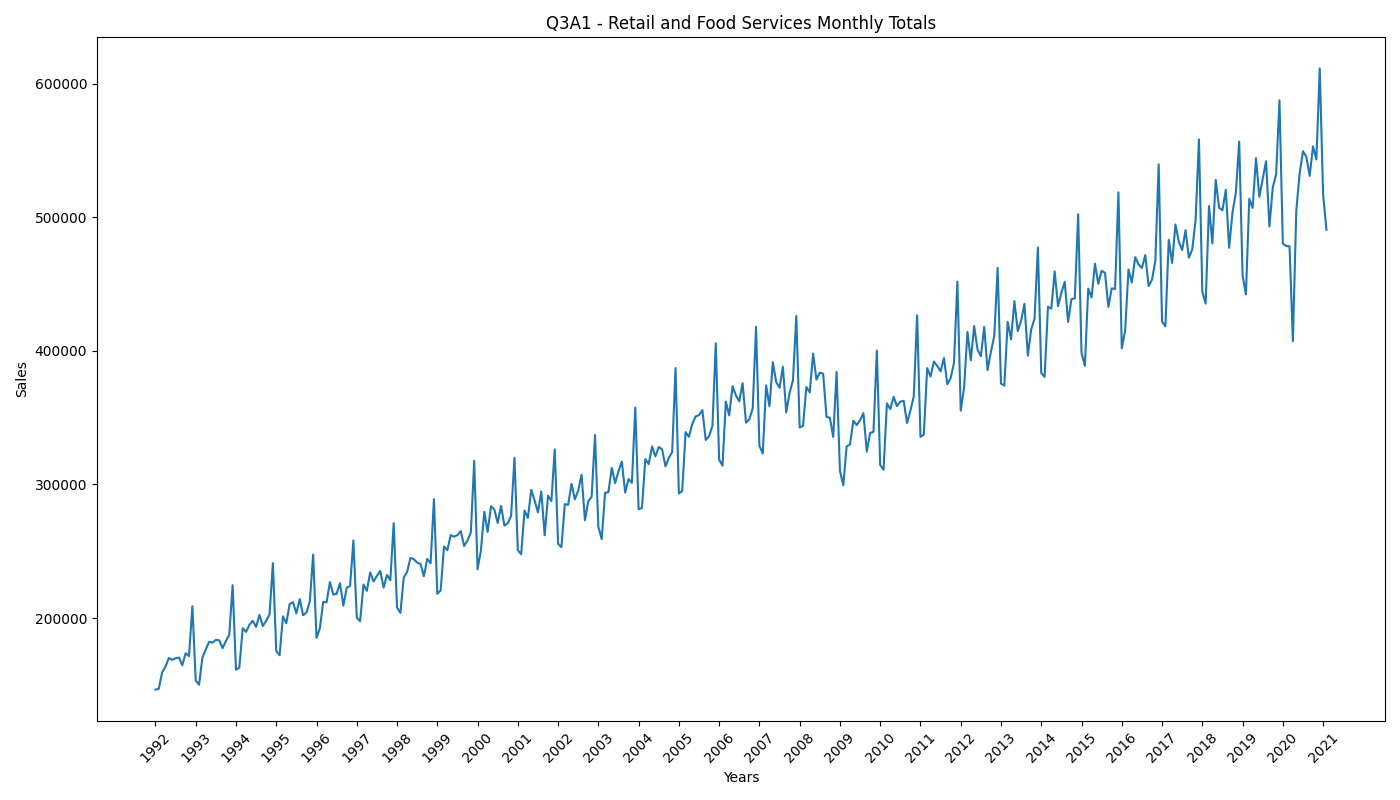


**Summary:**

The provided time series chart illustrates the monthly total sales for retail and food services 1992 to 2021. Some insights:

**Overall Trend:** There's a clear upward trend in sales over the years, which suggests growth in the retail and food services sectors over time.

**Seasonality:** There are regular fluctuations within each year, which likely indicate seasonal trends in sales, such as increased spending during certain months due to holidays or seasonal shopping patterns.

**Abnormal Peaks** Certain years show spikes that are significantly higher than the surrounding data points. These could represent periods of unusually high sales or data anomalies.

To clean up and visualize the trend more clearly, you might consider the following adjustments:

**Smoothing:** Applying a rolling average or a moving average could smooth out short-term fluctuations and reveal the long-term trend more clearly.

**Seasonal Adjustment:** Adjusting for seasonality, by either aggregating the data annually or using a seasonal adjustment method, would make the overall trend clearer without the monthly variations.

#### Ancillary Scripts

The following SQL queries were written to try and achieve some of the smoothing of the data. The first using moving averages, and the second uses retail quarters. There is a description of each part of the script and a corresponging plot.

**Moving Averages Script:**

```
WITH MovingAverages AS (
    SELECT
        Monthly_Data.Year,
        Monthly_Data.Month,
        SUM(Monthly_Data.Value) AS TotalSales,
        AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS ThreeMonthAvg,
        AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) AS SixMonthAvg,
        AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) AS TwelveMonthAvg
    FROM
        Monthly_Data
    JOIN 
        NAIC_Codes ON Monthly_Data.NAIC_Code_ID = NAIC_Codes.NAIC_Code_ID
    JOIN
        NAIC_Group_Mapping ON NAIC_Codes.NAIC_Code = NAIC_Group_Mapping.NAIC_Code
    JOIN
        NAIC_Groups ON NAIC_Group_Mapping.Group_ID = NAIC_Groups.Group_ID
    WHERE
        NAIC_Groups.Group_Name = 'Retail and Food Services'
    GROUP BY
        Monthly_Data.Year, Monthly_Data.Month)
SELECT
    Year,
    Month,
    TotalSales,
    ThreeMonthAvg,
    SixMonthAvg,
    TwelveMonthAvg
FROM
    MovingAverages
ORDER BY
    Year, Month;
```

This SQL script is designed to calculate moving averages for total sales data in the 'Retail and Food Services' sector from a database that stores monthly data. The script uses Common Table Expressions (CTEs) and window functions to achieve this. Here is a step-by-step explanation of the script:

**CTE Definition:** The script starts by defining a Common Table Expression (CTE) named MovingAverages. CTEs allow you to create a temporary result set that you can reference within a SELECT, INSERT, UPDATE, or DELETE statement.

**Data Selection and Aggregation:** Inside the CTE, the script selects the year and month from the Monthly_Data table and sums the sales values (Value) to get TotalSales for each month of each year.

**Calculating Moving Averages:** It then calculates three types of moving averages for the total sales:

**ThreeMonthAvg:** This is the 3-month moving average, calculated by taking the average of the current month's total sales and the total sales of the two preceding months.
**SixMonthAvg:** This is the 6-month moving average, calculated by taking the average of the current month's total sales and the total sales of the five preceding months.
**TwelveMonthAvg:** This is the 12-month moving average, calculated by taking the average of the current month's total sales and the total sales of the eleven preceding months.

These moving averages are calculated using the AVG aggregate function with the OVER clause, which defines a window for the average to operate over. The ROWS BETWEEN part of the clause specifies the range of the window in terms of rows (i.e., months in this context).

**Joins:** The script joins the Monthly_Data table with NAIC_Codes, NAIC_Group_Mapping, and NAIC_Groups tables to filter the data specifically for the 'Retail and Food Services' sector. This implies that the data spans multiple sectors, and these joins help to isolate data for the sector of interest.

**WHERE Clause:** The WHERE clause restricts the results to only include rows where the Group_Name is 'Retail and Food Services'.

**GROUP BY:** It groups the results by Year and Month, which is necessary because the script uses aggregate functions like SUM and AVG.

**Outer SELECT:** After the CTE is defined, the script selects the year, month, total sales, and the three different moving averages from the MovingAverages temporary result set.

**ORDER BY:** Finally, the script orders the results by year and month, which helps to present the data in chronological order.

This script provides a list of years and months, the total sales for each of these periods, and the three different moving averages, which can be used to analyze sales trends over time in the 'Retail and Food Services' sector. The moving averages smooth out short-term fluctuations and highlight longer-term trends in the data.

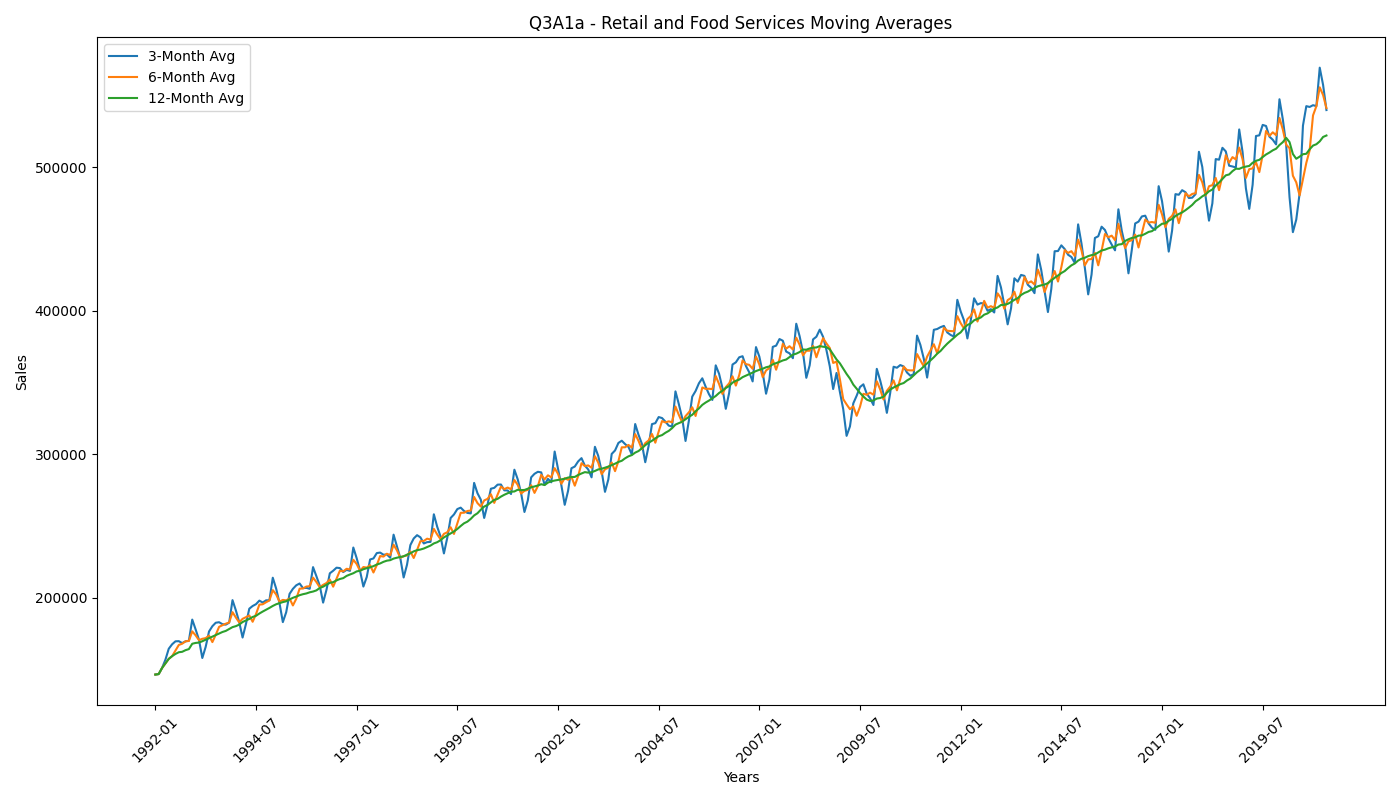


**Summary:**

There are three moving averages presented in the plot:

**3-Month Average (Blue Line):** This line represents the average sales over a rolling period of three months. It's the most volatile of the three lines shown, as it reacts more quickly to short-term changes in the data.

**6-Month Average (Orange Line):** This line represents the average sales over a rolling period of six months. It is less volatile than the 3-month average line and smoothes out the data further, providing a medium-term trend.

**12-Month Average (Green Line):** This line represents the average sales over a rolling period of twelve months (1 year). It is the smoothest line and reflects the long-term trend, as it averages out the seasonal fluctuations over the course of a year.

**Trends and Information from the Plot:**

**Overall Upward Trend:** There is a clear upward trend in the sales of retail and food services over the years, indicating growth in this sector.

**Seasonality:** The periodic peaks and troughs, especially noticeable in the 3-month average, suggest there is some seasonality in the sales data. This is typical for retail and food services, which often see sales increase during certain times of the year (like holidays) and decrease during others.

**Economic Fluctuations:** There are certain periods where all three lines dip and rise together, indicating economic events that affected sales across all periods (short, medium, and long term). For instance, there appears to be a significant dip around the early 2000s and another during the late 2000s, which may correspond to economic downturns, such as the dot-com bubble burst and the 2008 financial crisis.

**Convergence and Divergence:** At certain points, the lines come close together (convergence), indicating that the short-term sales are similar to the long-term trend. At other points, they diverge, which could suggest a change in the trend or a significant event causing short-term volatility.


**Quarterly Script:**

```
WITH QuarterlySales AS (
    SELECT
        md.Year AS Year,
    CASE
        WHEN md.Month BETWEEN 1 AND 3 THEN 'Q1'
        WHEN md.Month BETWEEN 4 AND 6 THEN 'Q2'
        WHEN md.Month BETWEEN 7 AND 9 THEN 'Q3'
        WHEN md.Month BETWEEN 10 AND 12 THEN 'Q4'
        END AS Quarter,
        SUM(md.Value) AS QuarterlyTotal
    FROM
        Monthly_Data md
    JOIN
        NAIC_Codes nc ON md.NAIC_Code_ID = nc.NAIC_Code_ID
    JOIN
        NAIC_Group_Mapping ngm ON nc.NAIC_Code = ngm.NAIC_Code
    JOIN
        NAIC_Groups ng ON ngm.Group_ID = ng.Group_ID
    WHERE
        ng.Group_Name = 'Retail and Food Services'
    GROUP BY
        md.Year, Quarter)
SELECT
    Year,
    Quarter,
    SUM(QuarterlyTotal) AS QuarterlySales
FROM
    QuarterlySales
GROUP BY
    Year, Quarter
ORDER BY
    Year, Quarter;
```

This SQL script calculates the total sales for each quarter for the 'Retail and Food Services' sector from a database that organizes sales data on a monthly basis.

**CTE Definition (QuarterlySales):** A Common Table Expression named QuarterlySales is defined to create a temporary result set.

**Data Selection:**
The Year is selected directly from the Monthly_Data table (aliased as md). The Quarter is determined using a CASE statement based on the Month from the Monthly_Data table. The Month value is categorized into one of four quarters (Q1, Q2, Q3, Q4) based on its numerical value:

* January to March (1-3) is Q1
* April to June (4-6) is Q2
* July to September (7-9) is Q3
* October to December (10-12) is Q4

The QuarterlyTotal is calculated by summing the Value for each grouping of Year and Quarter.

**Joins:**
The Monthly_Data table is joined with the NAIC_Codes table (aliased as nc) on the NAIC_Code_ID. The NAIC_Codes table is then joined with the NAIC_Group_Mapping table (aliased as ngm) on the NAIC_Code. Lastly, the NAIC_Group_Mapping table is joined with the NAIC_Groups table (aliased as ng) on the Group_ID.

**WHERE Clause:** This filters the data to include only the entries where the Group_Name in NAIC_Groups is 'Retail and Food Services'.

**GROUP BY:** The data is grouped by Year and the calculated Quarter to ensure that sales are aggregated correctly for each quarter of each year.

**Outer SELECT Statement:**

The script selects the Year, Quarter, and the sum of QuarterlyTotal (which it names QuarterlySales) from the QuarterlySales CTE. It then groups the results by Year and Quarter again to aggregate the data in the temporary result set.

**ORDER BY Clause:** Finally, the results are ordered by Year and Quarter to ensure the data is presented in chronological order.

It will return a list of years, quarters, and the total sales for each quarter for the 'Retail and Food Services' sector. It allows analysts to understand the performance of the sector on a quarterly basis, which is often more useful for identifying seasonal trends and patterns than monthly data.

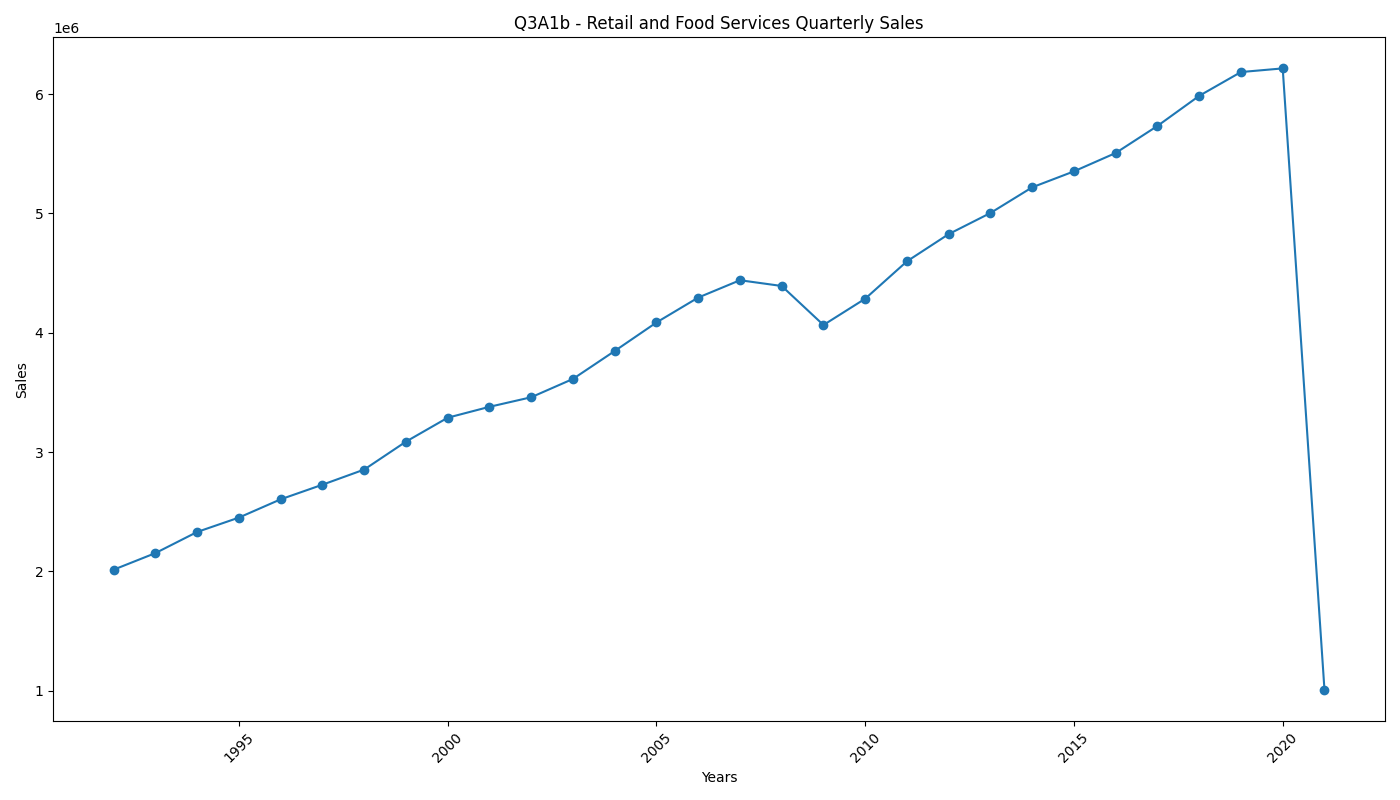


**Summary:**

Here are the main observations from the plot:

**Steady Growth Trend:** The sales show a general upward trend from 1992 until around 2019. This indicates that the retail and food services sector experienced growth over this time period. The sharp drop to the last data point is the partial year 2021 data.

**Periodic Fluctuations:** The sales values show some fluctuations, which are typical in quarterly reports due to seasonality, with certain quarters consistently higher or lower due to seasonal consumer behavior.

**Sharp Decline in 2020:** There is a very sharp decline in sales starting in 2020. Given the timeline, this could be indicative of the impact of the COVID-19 pandemic, which caused many retail and food service businesses to close or limit operations, thereby significantly reducing sales. Also the data from the partial year, 2021, is skewing this result.

Each dot represents the sales figure for a specific quarter, with the line connecting them to show the continuous nature of the data.

This plot would be particularly useful for illustrating the impact of external factors (like the pandemic) on the retail and food services sector. It also highlights the importance of considering current events when analyzing economic data, as such events can cause significant deviations from long-term trends.


#### Sporting Goods, Hobbies, and Books

To answer the questions for the second subsection outlined above, the following SQL Query Scripts were used:

**Script 1**

```
SELECT
    NC.Business_Type,
    SUM(MD.Value) AS TotalSales
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
WHERE
    NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
GROUP BY
    NC.Business_Type
ORDER BY
    TotalSales DESC;
```

This script retrieves and summarizes sales data from the two tables:

**SELECT:** This statement begins the query, indicating that data will be retrieved.

NC.Business_Type: This selects the Business_Type field from the NAIC_Codes table. It's going to be included in the output of the query.
SUM(MD.Value) AS TotalSales: This calculates the total sum of the Value field from the Monthly_Data table, which presumably stores sales values. The total sum is then given an alias TotalSales for easier reference in the result set.

**FROM Monthly_Data MD:** This specifies the Monthly_Data table as the source of the data and gives it the alias MD for use in the rest of the query.

**JOIN NAIC_Codes NC:** This performs an inner join operation with the NAIC_Codes table, which is given the alias NC. An inner join will combine rows from both tables where the join condition is true.

**ON MD.NAIC_Code_ID = NC.NAIC_Code_ID:** This is the join condition. It indicates that the join should be made where the NAIC_Code_ID field from Monthly_Data matches the NAIC_Code_ID field in NAIC_Codes.

**WHERE NC.Business_Type IN (...):** The WHERE clause filters the results to only include rows where the Business_Type from the NAIC_Codes table matches one of the specified types: 'Book stores', 'Sporting Goods Stores', or 'Hobby, Toy, and Game Stores'.

**GROUP BY NC.Business_Type:** This groups the results by the Business_Type field from the NAIC_Codes table. This is necessary because the SUM() function is being used, which is an aggregate function. Data needs to be grouped for the sum to be calculated for each business type.

**ORDER BY TotalSales DESC:** This orders the results by the TotalSales field in descending order, meaning the business type with the highest total sales will be at the top of the result set.

In summary, this script retrieves the sum of sales (TotalSales) for each specified type of business from the NAIC_Codes table, groups the results by business type, and orders them from highest to lowest total sales. The actual sales data is sourced from the Monthly_Data table based on a matching NAIC_Code_ID field in both tables.

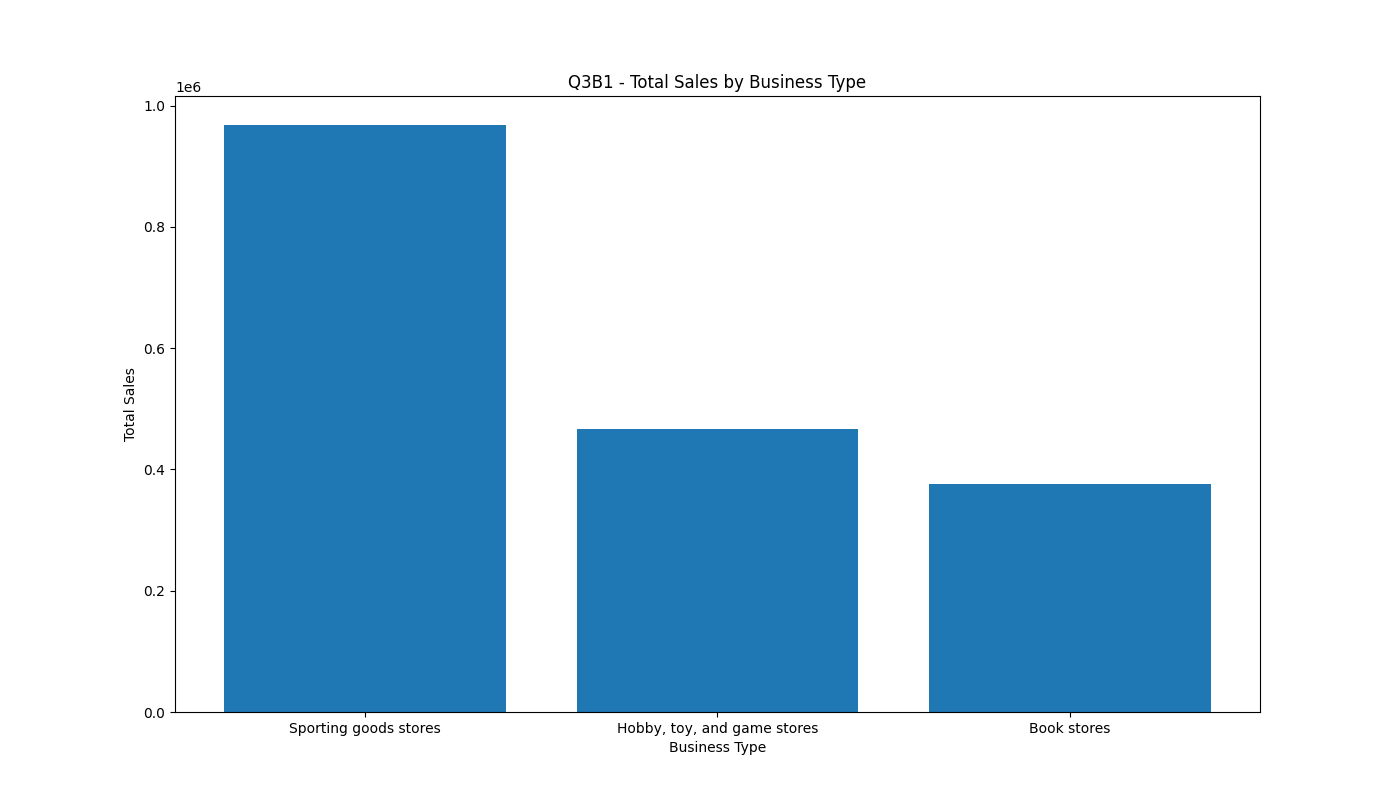


**Summary**

This bar chart presents a comparison of total sales by business type, specifically for sporting goods stores, hobby, toy, and game stores, and book stores. The plot displays that the sporting goods stores clearly have the largest volume in sales for the period from 1992 through February 2021.

**Script 2**

```
WITH YearlySales AS (
    SELECT
        NC.Business_Type,
        MD.Year,
        SUM(MD.Value) AS TotalSales,
        LAG(SUM(MD.Value)) OVER(PARTITION BY NC.Business_Type ORDER BY MD.Year) AS PrevTotalSales
    FROM
        Monthly_Data MD
    JOIN
        NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
    WHERE
        MD.Year BETWEEN 1992 AND 2020
        AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
    GROUP BY
        NC.Business_Type, MD.Year)
                
SELECT
    Business_Type,
    Year,
    CASE 
        WHEN PrevTotalSales = 0 OR PrevTotalSales IS NULL THEN NULL
            ELSE (TotalSales - PrevTotalSales) / PrevTotalSales * 100
            END AS GrowthRate
FROM
    YearlySales
WHERE 
    PrevTotalSales IS NOT NULL
ORDER BY 
    Business_Type, 
    Year;
```

Calculates the yearly growth rates of sales for specific businesses over a range of years.

**CTE Declaration:** The WITH YearlySales AS part declares a CTE named YearlySales which is used to perform calculations and can be referenced later in the query.

**Inner Query:** Inside the CTE, the script performs the following actions:

It selects the Business_Type and Year from the joined Monthly_Data (aliased as MD) and NAIC_Codes (aliased as NC) tables.
It calculates TotalSales for each business type and year by summing the Value field from Monthly_Data.
It uses the LAG window function to get the previous year's total sales (PrevTotalSales) for each business type. This is partitioned by Business_Type and ordered by Year so that each business type's sales are compared to its previous year's sales.
The WHERE clause within the CTE filters the data to include only the years between 1992 and 2020 and only the business types of interest (Book stores, Sporting Goods Stores, Hobby, Toy, and Game Stores).
It groups the data by Business_Type and Year to ensure that the SUM and LAG functions calculate values within these groupings.

**Outer Query:** After the CTE is defined, the outer query does the following:

It selects Business_Type, Year, and a calculated GrowthRate.
The GrowthRate is a CASE expression that calculates the percentage change in sales compared to the previous year. If the previous year's total sales (PrevTotalSales) is 0 or NULL (which would make the growth rate undefined or infinitely large), it returns NULL.

The WHERE clause in the outer query filters out the first row of each partition because it does not have a previous year to compare to (PrevTotalSales is NULL).

The ORDER BY clause sorts the results by Business_Type and Year so you can see the progression of growth rates for each business type over the years.

This script provides an annual growth rate comparison for three types of stores (Book stores, Sporting Goods Stores, Hobby, Toy, and Game Stores) for each year from 1992 to 2020. The growth rate is expressed as a percentage, indicating how much the total sales have increased or decreased from the previous year.

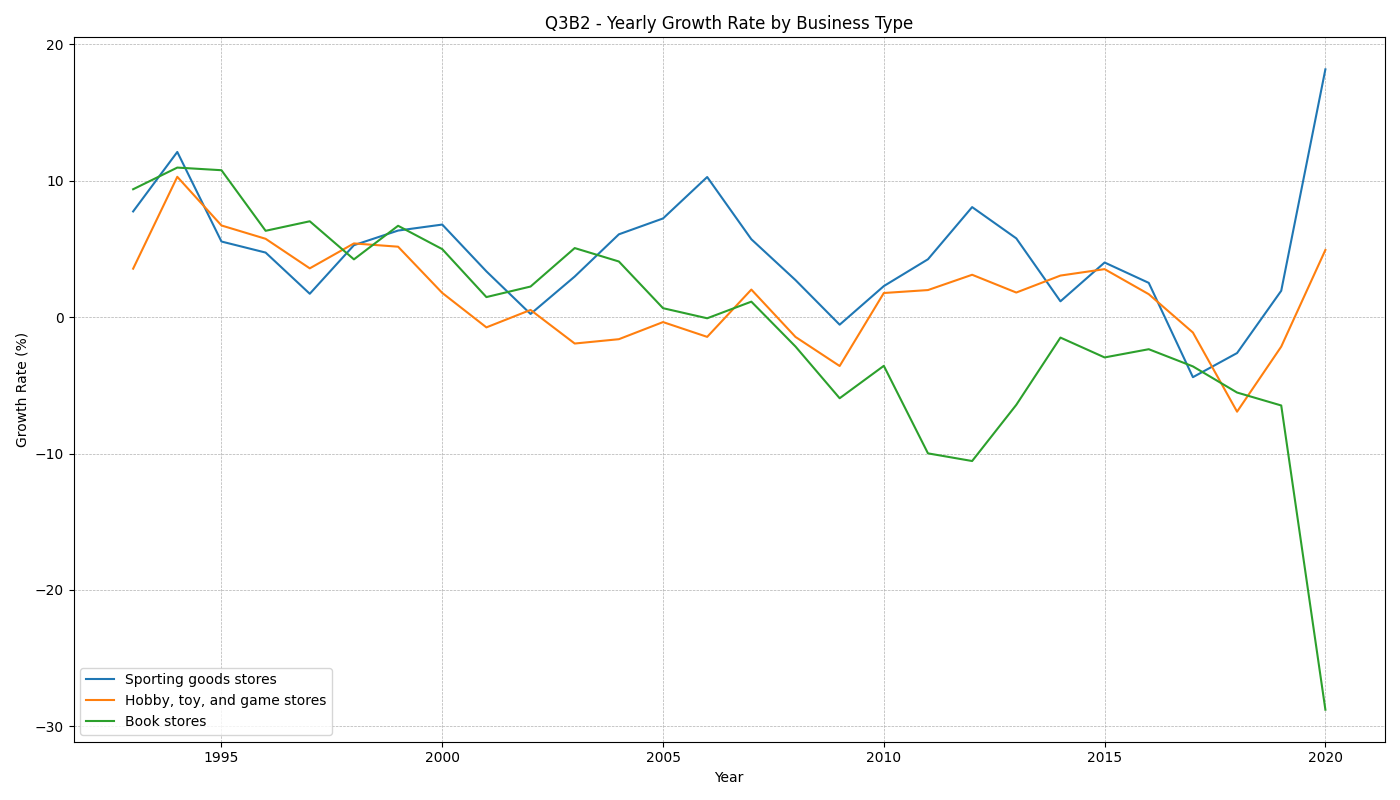


**Summary**

This plot shows the yearly growth rate in sales for three types of businesses: Sporting Goods Stores, Hobby, Toy, and Game Stores, and Book Stores.

**Volatility:** All three business types exhibit volatility in their yearly growth rates over the span of nearly three decades. This could suggest sensitivity to economic cycles, consumer trends, or other external factors.

**Comparative Trends:**

* Sporting Goods Stores (blue line): This category seems to have the most consistent growth with fewer years of negative growth. There's a notable peak around 2015 and a sharp increase starting from approximately 2019. However, there is a dramatic drop around 2020, which could be due to the impact of the COVID-19 pandemic.

* Hobby, Toy, and Game Stores (orange line): This line also shows fluctuations, with some sharp declines and rises. Interestingly, there seems to be a significant increase in growth rate around 2020, which may indicate a pivot to hobbies and home entertainment during the pandemic lockdowns.

* Book Stores (green line): Book stores appear to struggle the most, with several years showing negative growth. There is also a sharp decline in the growth rate in 2020, which is the most extreme of all the categories and could reflect the severe impact of the pandemic on physical retail book stores.

**Economic and Seasonal Factors:** The plot suggests that there might be economic or seasonal factors affecting the sales of these businesses. The sharp drop in 2020 across two of the three categories strongly points to the economic disruption caused by the COVID-19 pandemic.

**Trend Comparison:**

* Before 2020, Sporting Goods Stores and Hobby, Toy, and Game Stores appear to have a somewhat parallel trend, which diverges sharply during 2020.

* Book Stores show a general downward trend, indicating a longer-term struggle, possibly due to the rise of digital media and e-commerce.

**Zero Line:** The zero line (where the growth rate is 0%) is significant because it indicates stability. Values above the line indicate growth from the previous year, while values below the line indicate a decline in sales compared to the previous year.

**Smoothing:** The chart is based on yearly data, which smoothens out any seasonality that might be more apparent in monthly data. For businesses that are significantly affected by seasonal trends (like holidays for toy stores), monthly data might show more pronounced peaks and troughs.

This provides a clear visual representation of the sales growth trends for the three types of businesses over time, highlighting periods of growth and decline, and the stark impact of the COVID-19 pandemic in 2020 on these businesses.

**Script 3**

```
SELECT
    MD.Year,
    NC.Business_Type,
    SUM(MD.Value) AS TotalSales
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
WHERE
    MD.Year BETWEEN 1992 AND 2020
    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
GROUP BY
    MD.Year, NC.Business_Type
ORDER BY
    NC.Business_Type, MD.Year;
```

Aggregates sales data for the businesses from 1992 to 2020.

**SELECT clause:**

MD.Year: Selects the year from the "Monthly_Data" table, which is aliased as "MD".
NC.Business_Type: Selects the type of business from the "NAIC_Codes" table, which is aliased as "NC".
SUM(MD.Value) AS TotalSales: Calculates the sum of the "Value" column from the "Monthly_Data" table for each group (which will be defined in the GROUP BY clause) and labels this sum as "TotalSales".

**FROM clause:**
Monthly_Data MD: Specifies the "Monthly_Data" table as the source of the sales data and gives it the alias "MD" for ease of reference within the script.

**JOIN clause:**
NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID: Joins the "Monthly_Data" table with the "NAIC_Codes" table based on a common column, "NAIC_Code_ID". This common column is used to combine records from the two tables where there's a match. The "NAIC_Codes" table is given the alias "NC".

**WHERE clause:**
MD.Year BETWEEN 1992 AND 2020: Filters the records to include only those where the "Year" is between 1992 and 2020, inclusive.
NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores'): Further filters the records to only include those where the "Business_Type" is one of the three specified types of stores.

**GROUP BY clause:**
MD.Year, NC.Business_Type: Groups the resulting set of records by both the year and the business type, which means the SUM function will calculate the total sales for each unique combination of year and business type.

**ORDER BY clause:**
NC.Business_Type, MD.Year: Orders the final result set first by the business type and then by the year. This means that the results will be sorted alphabetically by business type, and within each business type, they will be sorted chronologically.

The script calculates the total sales for each year for each of the three specified types of stores from 1992 to 2020. The results were grouped by year and business type and ordered first by business type and then by year.

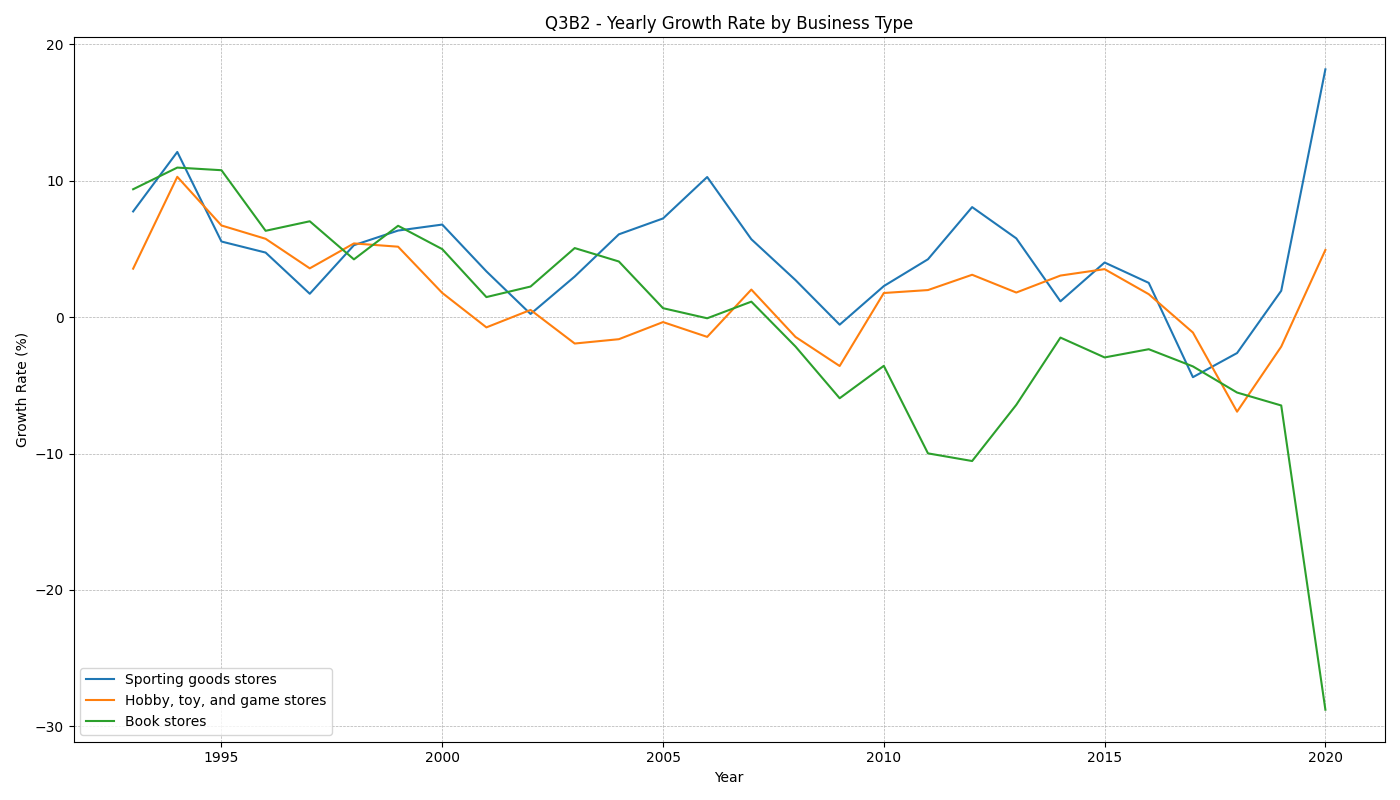


**Summary**

**Sporting Goods Stores:**

* The sales for Sporting Goods Stores have shown an overall upward trend from 1992 to 2020.
* There is a significant increase in sales towards the end of the timeline, particularly after 2015, suggesting a strong growth phase.
* This category has the highest sales figures compared to the other two, indicating it may be the most robust market segment of the three.

**Hobby, Toy, and Game Stores:**

* The Hobby, Toy, and Game Stores exhibit a relatively stable trend with gentle growth until around 2005, followed by a plateau.
* Sales appear to be relatively flat from around 2005 to 2015, indicating a period of stability without significant growth or decline.
* There is a slight decline after 2015, which might be due to various factors such as changes in consumer preferences, increased competition, or the impact of e-commerce.

**Book Stores:**

* Book Stores show an initial increase in sales until the early 2000s. This corresponds with the rise of eCommerce platofrms like Amazon.
* After the early 2000s, there is a noticeable and consistent decline in sales, which becomes steeper after 2015.
* The declining trend for bookstores could be due to the rise of digital media, e-books, and online retailers affecting traditional brick-and-mortar bookstore sales.

**General Observations:**

* Each business type shows a distinct trend, which may be influenced by industry-specific factors as well as broader economic conditions.
* The sharp changes in sales for Sporting Goods Stores and Book Stores after 2015 could indicate changes in consumer habits like more video gaming, increased health risks from some sports, or other market dynamics.
* The CoVID pandemic would have significant on all three businesses, as well as technological advancements.

**Script 4**

```
SELECT
    MD.Year,
    NC.Business_Type,
    SUM(CASE 
    WHEN MD.Month BETWEEN 1 AND 3 THEN MD.Value
        ELSE 0
        END) AS Q1_Sales,
    SUM(CASE 
    WHEN MD.Month BETWEEN 4 AND 6 THEN MD.Value
        ELSE 0
        END) AS Q2_Sales,
    SUM(CASE 
    WHEN MD.Month BETWEEN 7 AND 9 THEN MD.Value
        ELSE 0
        END) AS Q3_Sales,
    SUM(CASE 
        WHEN MD.Month BETWEEN 10 AND 12 THEN MD.Value
        ELSE 0
        END) AS Q4_Sales
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
WHERE
    MD.Year BETWEEN 1992 AND 2021
    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
GROUP BY
    MD.Year, NC.Business_Type
ORDER BY
    MD.Year, NC.Business_Type;
```

Reports the total sales for the three businesses broken down by quarter for each year between 1992 and 2021.

**SELECT Clause:** This part of the query specifies the columns to be returned by the query.
MD.Year retrieves the year from the Monthly_Data table.
NC.Business_Type retrieves the type of business from the NAIC_Codes table.

Four SUM(CASE ... END) statements calculate the total sales for each quarter. The CASE statement checks the month and sums the MD.Value (which presumably stands for the sales value) only if the month falls within the specified range for that quarter:

* Q1_Sales: Sum of MD.Value for months 1 to 3 (January to March).
* Q2_Sales: Sum of MD.Value for months 4 to 6 (April to June).
* Q3_Sales: Sum of MD.Value for months 7 to 9 (July to September).
* Q4_Sales: Sum of MD.Value for months 10 to 12 (October to December).

**FROM Clause:** The data is being fetched from the Monthly_Data table, which is being joined with the NAIC_Codes table on a common key NAIC_Code_ID. This implies that each record in the Monthly_Data table has an identifier that links to a record in the NAIC_Codes table which contains the description of the business type.

**WHERE Clause:** This is used to filter the data:
MD.Year BETWEEN 1992 AND 2021 restricts the results to the years 1992 through 2021.
NC.Business_Type IN (...) limits the results to the three specified business types.

**GROUP BY Clause:** The query aggregates (sums) the data at the level of year and business type. This means that for each year and each business type, there will be a single row in the result set showing the total sales for each quarter.

**ORDER BY Clause:** The results are ordered first by year in ascending order and then by business type. This makes it easier to read and analyze the trends year by year and by business type.

This provides a structured view of how each business type performed each quarter of every year between 1992 and 2021. It is a useful query for understanding seasonal trends and the performance of different business sectors over time.

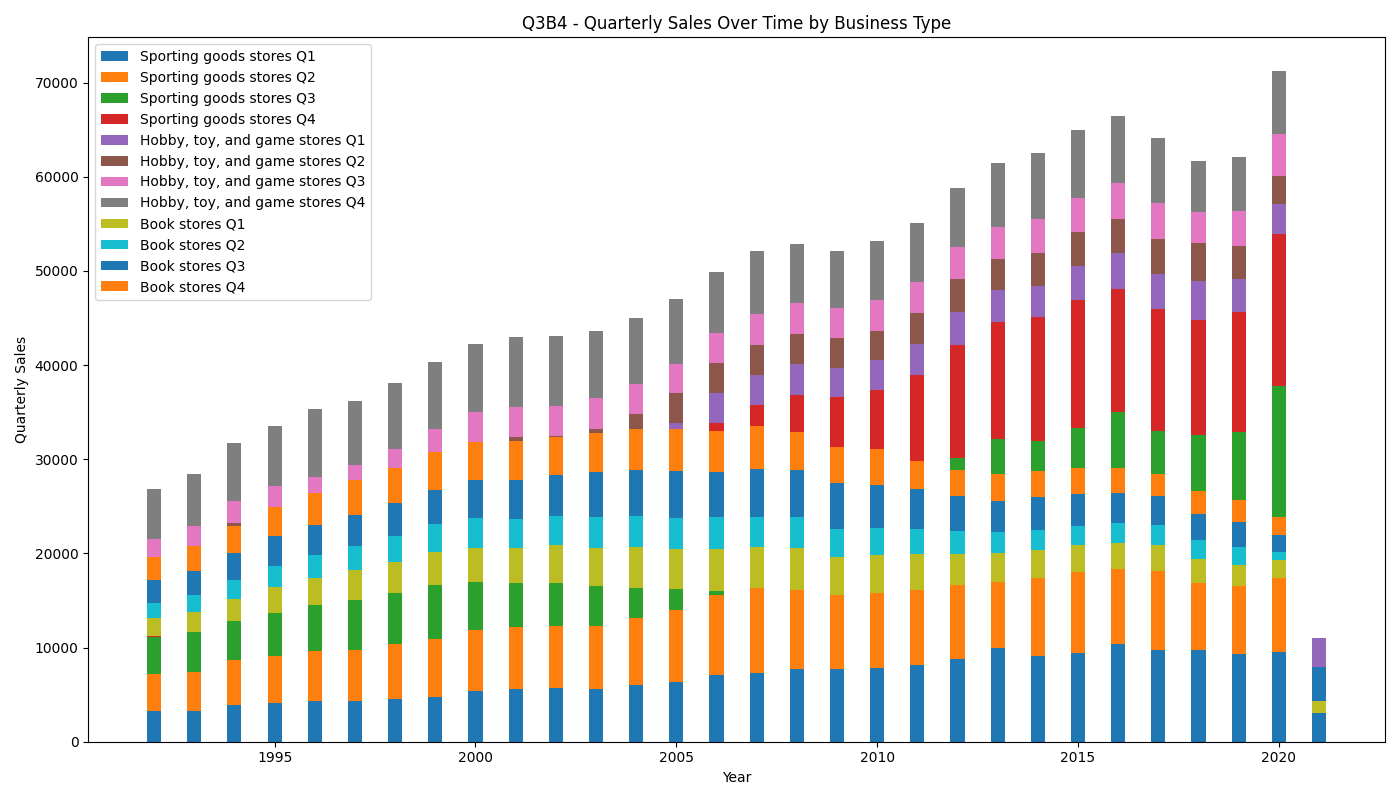


**Summary**

This plot presents quarterly sales over time by business type, displaying data for Sporting Goods Stores, Hobby, Toy, and Game Stores, and Book Stores. Each bar represents a year, and within each bar, there are segments of different colors that correspond to the sales in each quarter for each business type. Here are some insights that can be gleaned from the plot:

**Sporting Goods Stores:**

* The segment representing Q4 (usually in dark grey) tends to be the highest for Sporting Goods Stores, which may indicate a seasonal increase in sales during this period, probably due to holiday shopping, possibly also due to winter sports.
* There is a consistent growth trend over time, particularly from the early 2000s onwards.

**Hobby, Toy, and Game Stores:**

* Similarly to Sporting Goods, Q4 (displayed in purple) is often the strongest quarter, which again could be due to holiday shopping.
* Sales for these stores also appear to have a gradual increasing trend, though with some fluctuation.

**Book Stores:**

* Book store sales do not have as pronounced a peak in Q4 as the other two types, suggesting less seasonality in sales. However, Q4 is generally still one of the stronger quarters.
* There is a noticeable decline in Book Store sales over the years, with later years showing lower segments across all quarters, reflecting a possible shift in consumer behavior away from physical book stores towards eCommerce platforms. This could also be due to changes in delivery format, like eBooks and Audiobooks.

**General Trends:**

* For all business types, the fourth quarter seems to be strong, indicating a possible overall trend in consumer spending during that period.
* As seen from many other of the plots, there is a general upward trend in sales over time for Sporting Goods and Hobby, Toy, and Game Stores, suggesting growth in these sectors.
*The plot also shows that the Book Stores sector might be struggling or experiencing decreased sales over the last few decades.

**Comparison between Business Types:**

* Sporting Goods Stores consistently have higher sales compared to the other two types of stores.
* Hobby, Toy, and Game Stores follow next, with Book Stores generally showing the lowest sales figures.
* The disparity between the types of stores has been increasing over the years, especially noticeable in the last few years of the chart.

**Abnormalities:**

* The last bar (representing the year 2021) only has segments for Sporting Goods Stores, indicating incomplete data for the other two types of stores, and also a truncated year (only January and February data provided).

**Script 5**

```
SELECT
    NC.Business_Type,
    SUM(CASE 
        WHEN MD.Year = 2020 THEN MD.Value
        ELSE 0
        END) AS Sales_2020,
    ROUND(
        AVG(CASE 
        WHEN MD.Year <> 2020 THEN (MD.Value - PrevYear.Value) / PrevYear.Value * 100
        ELSE NULL
        END), 2
    ) AS Avg_Percentage_Increase
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
LEFT JOIN
    Monthly_Data PrevYear ON MD.NAIC_Code_ID = PrevYear.NAIC_Code_ID AND MD.Year = PrevYear.Year + 1
WHERE
    MD.Year BETWEEN 1992 AND 2020
    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
GROUP BY
    NC.Business_Type
ORDER BY
    NC.Business_Type;
```

Calculates and summarizes the total sales for the year 2020 and the average percentage increase in sales over the years for the three businesses.

**SELECT Clause:** This part of the query specifies the columns to be displayed in the final result set:
NC.Business_Type: The type of business from the NAIC_Codes table.
SUM(CASE WHEN MD.Year = 2020 THEN MD.Value ELSE 0 END) AS Sales_2020: A conditional sum that adds up all sales (MD.Value) for the year 2020. If the year is not 2020, it contributes 0 to the sum. The result is labeled as Sales_2020.
ROUND(AVG(CASE WHEN MD.Year <> 2020 THEN (MD.Value - PrevYear.Value) / PrevYear.Value * 100 ELSE NULL END), 2) AS Avg_Percentage_Increase: This calculates the average yearly percentage increase in sales for years other than 2020. For each year, it computes the percentage increase from the previous year and averages these values, rounding the result to two decimal places. The result is labeled as Avg_Percentage_Increase.

**FROM Clause:** The data is being taken from the Monthly_Data table aliased as MD.

**JOIN Clause:** This joins the NAIC_Codes table (aliased as NC) to Monthly_Data. The join is on the NAIC_Code_ID field which is common to both tables. This is to filter the data to the specific business types of interest.

**LEFT JOIN Clause:** This performs a left join on the Monthly_Data table to itself (aliased as PrevYear). This is done to compare each year’s data with the previous year by matching records where the previous year's Year is one less than the current year's Year for the same NAIC_Code_ID.

**WHERE Clause:** This filters the records to include only those between the years 1992 and 2020 and where the Business_Type is one of 'Book stores', 'Sporting Goods Stores', or 'Hobby, Toy, and Game Stores'.

**GROUP BY Clause:** This groups the results by Business_Type because the SELECT statement includes aggregation functions (SUM and AVG) that need to be applied to distinct groups of rows.

**ORDER BY Clause:** This orders the final result set by Business_Type.

Provides the business types with their total sales for 2020 and their average yearly percentage increase in sales (excluding the year 2020). This query can help in analyzing how different types of businesses performed in 2020 compared to their average growth rate over the years.

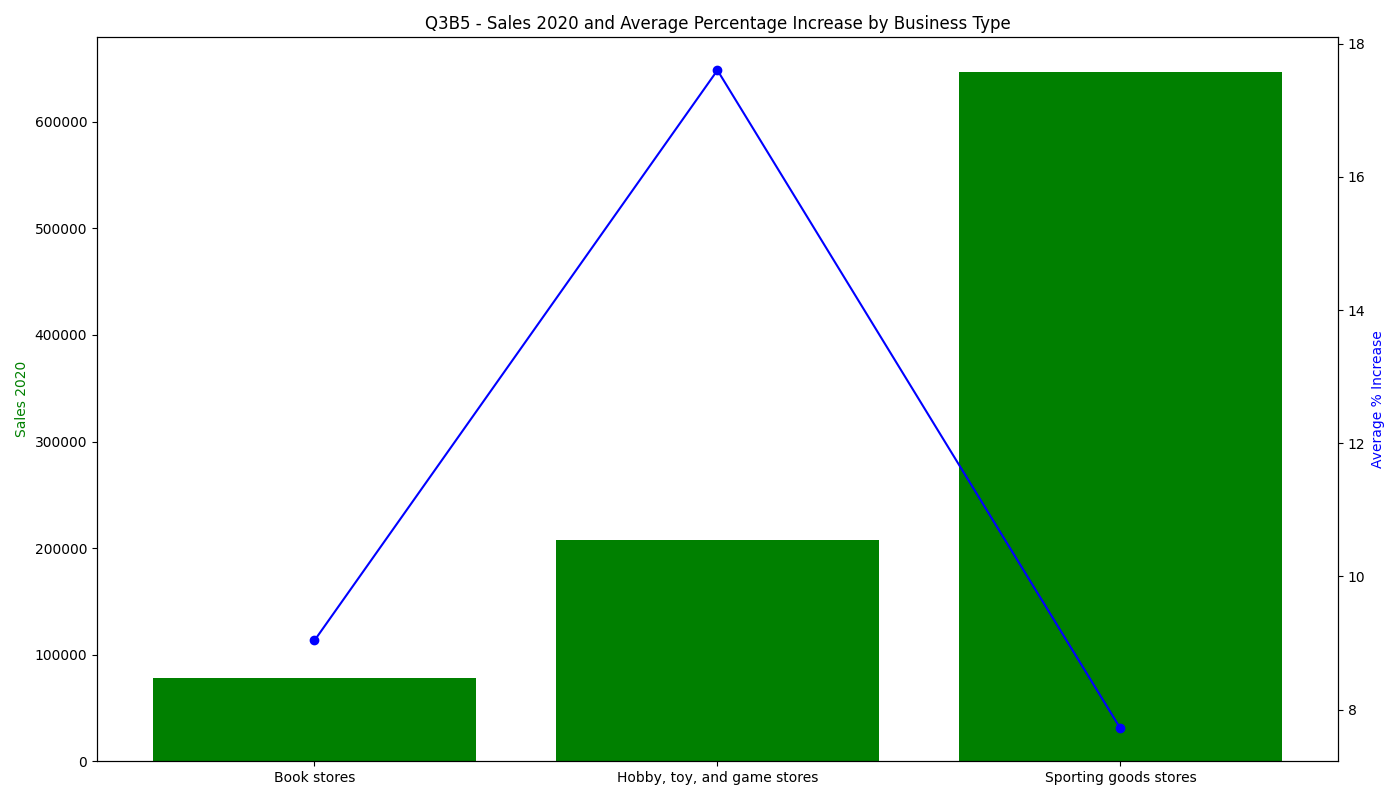


**Summary**

This plot shows two different metrics for the three businesses. These metrics are the sales in 2020 (represented by bars) and the average percentage increase in sales over the years (represented by a line graph with points).

**Sales in 2020:**

* Book stores had the lowest sales in 2020 compared to the other two business types.
* Hobby, toy, and game stores had higher sales than book stores but significantly lower than sporting goods stores.
* Sporting goods stores had the highest sales in 2020 by a large margin.

**Average Percentage Increase in Sales (over the years excluding 2020):**

* Book stores had the lowest average percentage increase in sales, as indicated by the position of the point on the line graph corresponding to book stores.
* Hobby, toy, and game stores had a higher average percentage increase than book stores.
* Sporting goods stores had the highest average percentage increase, which is significantly higher than the other two business types, as indicated by the point's position on the right side of the graph.

**Trends and Possible Implications:**

* The difference in average percentage increase and actual sales in 2020 suggests that even though sporting goods stores had a high average increase in sales over the years, their sales in 2020 were exceptional, possibly due to increased interest in outdoor and fitness activities during the year (which might be influenced by the pandemic or other market trends).
* The low sales in book stores, coupled with a low average increase, could imply that this sector is facing challenges, potentially due to digitalization or changes in consumer behavior.
* Hobby, toy, and game stores are performing better than book stores in terms of sales and growth but are not doing as well as sporting goods stores. This could be due to a balanced mix of in-store and online sales or a steady demand for these products.

In summary, the plot shows that sporting goods stores had an outstanding year in 2020 in terms of sales compared to the other business types and also enjoyed the highest average growth rate over the years prior to 2020. Book stores lag behind on both metrics, suggesting they may be struggling. Hobby, toy, and game stores sit in the middle, with better performance than book stores but not reaching the heights of sporting goods stores.

### Subsection Conclusion:

**What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?**

An economic trend is a pattern of economic behavior that can be identified by a series of data points over a specific period. Trends can be upward, downward, or sideways (neutral) and can apply to anything from global economies to local markets showing the direction that particular economic factor is moving.[2]

Economic trends are considered important measures to predict quantities like spending patterns for several reasons:

* Forecasting and Planning: Businesses and governments use economic trends to forecast future conditions and to plan accordingly. If a trend indicates increasing consumer spending, businesses may increase production, hire more employees, or expand operations.

* Investment Decisions: Investors look at trends to make decisions about where to allocate their funds. For example, a trend indicating a rise in technology spending might lead investors to buy stocks in the tech sector.

* Policy Making: Economic trends are essential for policymakers to adjust interest rates, tax policies, and government spending to steer the economy towards desired outcomes like full employment or inflation control.

* Market Analysis: Trends help analysts to understand market conditions, customer preferences, and the economic cycle, which in turn helps in making decisions related to marketing, product development, and pricing strategies.

* Predicting spending patterns, specifically, helps businesses optimize inventory levels, plan promotions, and manage resources effectively to maximize profit and minimize waste.

**What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?**

* The overall trend of the retail and food services categories are trending up with two long bull periods when the economy was booming and growth was significant. There are two important dowturns in the data corresponding to economic collapse of 2008/2009 and the pandemic period in 2020.

* The two additional plots provided smooth out the data using moving averages, and aggregating to quarter totals providing a cleaner trend.

**When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster? Which one is higher? Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly?**

**Highest Trend Over Time**

* Sporting Goods Stores: They have the highest overall sales and continue to grow over the period, showing a strong trend upwards.
* Hobby, Toy, and Game Stores: These show growth but not as consistently high as Sporting Goods Stores.
* Book Stores: The trend for bookstores is generally flat or slightly declining, especially when compared to the other two categories.

**Growth Rate**

* The yearly growth rate for each business type. Sporting goods stores show the most significant spike in growth rate towards the end, which suggests they grew faster than the other categories, especially in the years leading up to 2020.
* The decline for bookstores is especially pronounced in the latest year shown on the graph.

**Seasonal Patterns**

* The quarterly data plot shows that for all business types, there is a noticeable increase in Q4, which can be attributed to holiday shopping trends.

**Changes in 2020**

* There's a sharp decline in the growth rate for bookstores in 2020. This might indicate a significant impact due to the COVID-19 pandemic, possibly due to lockdowns and a shift to online purchases.
* Sporting goods and hobby stores also show a decline in growth rate in 2020, but not as severe as bookstores.

**Monthly vs. Yearly**

* Yearly data is better for identifying overall trends and growth rates. However, the monthly or quarterly data plots are crucial for observing seasonal patterns and more immediate changes in consumer behavior.

**Overall**

* Sporting goods stores not only have the highest total sales, but they also have the most significant positive growth trend, especially in the last year shown.
* Hobby, toy, and game stores have moderate growth, but not as pronounced as sporting goods stores.
* Book stores are struggling in comparison, with a much flatter overall sales trend and a sharp decline in growth rate towards 2020.
* There are clear seasonal trends, with Q4 generally being the strongest quarter for all business types, likely due to holiday shopping.
* The data indicates substantial changes in 2020, which could be related to the COVID-19 pandemic affecting consumer spending and shopping habits.

[Back to top](#Index)

### 3.4 Explore Percentage Change

#### Clothing Comparison

```
SELECT
    MD.Year,
    SUM(CASE 
        WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
        ELSE 0
    END) AS Men_Sales,
    SUM(CASE 
        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
        ELSE 0
    END) AS Women_Sales,
    (SUM(CASE 
        WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
        ELSE 0
    END) - SUM(CASE 
        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
        ELSE 0
    END)) / SUM(CASE 
        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
        ELSE 0
    END) * 100 AS Percent_Difference_Men_Women,
    (SUM(CASE 
        WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
        ELSE 0
    END) - LAG(SUM(CASE 
        WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
        ELSE 0
        END), 1) OVER (ORDER BY MD.Year)) / LAG(SUM(CASE 
            WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
             ELSE 0
        END), 1) OVER (ORDER BY MD.Year) * 100 AS Percent_Difference_Men_Year,
    (SUM(CASE 
        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
        ELSE 0
     END) - LAG(SUM(CASE 
        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
        ELSE 0
        END), 1) OVER (ORDER BY MD.Year)) / LAG(SUM(CASE 
            WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
            ELSE 0
        END), 1) OVER (ORDER BY MD.Year) * 100 AS Percent_Difference_Women_Year
FROM
    Monthly_Data MD
JOIN
    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
WHERE
    MD.Year BETWEEN 1992 AND 2021
    AND (NC.Business_Type = "Men's clothing stores" OR NC.Business_Type = "Women's clothing stores")
GROUP BY
    MD.Year
ORDER BY
     MD.Year;
```

Retrieves sales data for men's and women's clothing stores from the data, compares the sales between these two categories, and also compares the sales against previous years.

**SELECT MD.Year:**

Selects the year from the Monthly_Data (MD) table.
SUM(CASE WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value ELSE 0 END) AS Men_Sales:

Calculates the total sales for men's clothing stores. It uses a CASE statement to sum MD.Value only when the Business_Type is "Men's clothing stores"; otherwise, it counts as 0.
SUM(CASE WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value ELSE 0 END) AS Women_Sales:

Similar to the previous calculation, but for women's clothing stores.

**The Percent_Difference_Men_Women calculation:**

This calculates the percentage difference between the sales of men's and women's clothing stores. It's computed by subtracting women's sales from men's sales, dividing by women's sales, and then multiplying by 100 to get a percentage.

**The Percent_Difference_Men_Year calculation:**

This calculates the year-over-year percentage change in sales for men's clothing stores. It uses the LAG window function to access the previous year's sales (based on ordering by year), subtracts it from the current year's sales, divides by the previous year's sales, and multiplies by 100 for a percentage.

**The Percent_Difference_Women_Year calculation:**

Similar to the men's calculation, this computes the year-over-year percentage change in sales for women's clothing stores.

**FROM Monthly_Data MD JOIN NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID:**

This specifies the tables from which to retrieve the data (Monthly_Data and NAIC_Codes) and joins them on a common field, NAIC_Code_ID.
WHERE MD.Year BETWEEN 1992 AND 2021 AND (NC.Business_Type = "Men's clothing stores" OR NC.Business_Type = "Women's clothing stores"):

This filters the data to include only the years 1992 to 2021, and only for the business types of men's or women's clothing stores.

**GROUP BY MD.Year:**

This groups the results by year so that the SUM calculations are performed for each year separately.

**ORDER BY MD.Year:**

This orders the results by year in ascending order.

It performs several operations to extract meaningful insights from sales data, such as comparing sales between two business types and analyzing sales trends over the years.

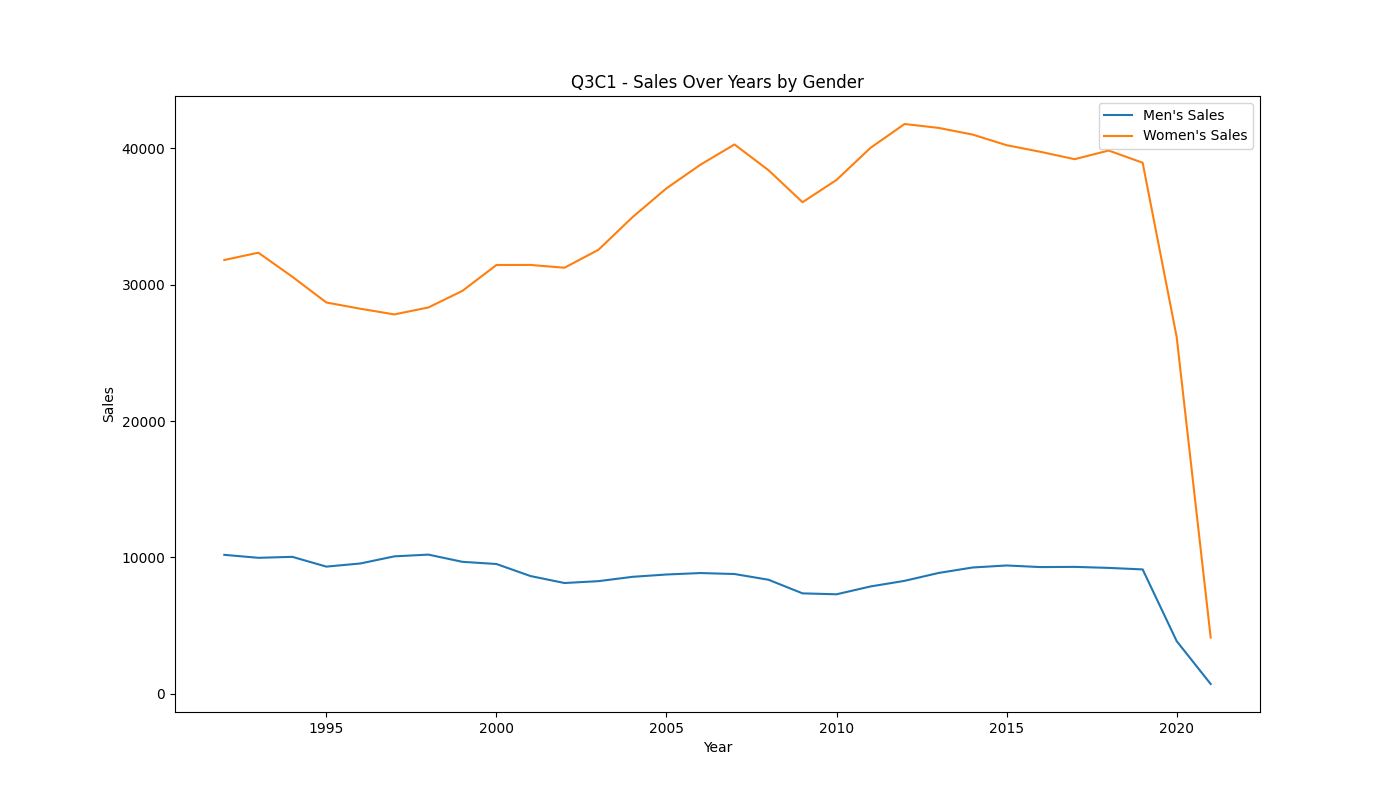


**Summary**

This plot displays the sales over years, categorized by gender - men's and women's clothing sales.

**Women's Sales (Orange Line):**
There's a general upward trend in women's clothing sales from the mid-1990s through approximately 2015, indicating a growing market or increased spending in women's clothing stores during this period. However, there is a sharp decline around 2020, which could be due to various factors such as changes in consumer behavior, economic downturns, or external factors like the COVID-19 pandemic which led to a decrease in retail sales for many sectors.

**Men's Sales (Blue Line):**
The sales for men's clothing are significantly lower than those for women throughout the entire time period. The trend for men's sales is relatively flat with slight fluctuations, suggesting a stable but not significantly expanding market for men's clothing. There is also a noticeable drop in sales around 2020, similar to the drop in women's clothing sales, possibly due to the same external factors.

**Comparison and Market Insights:**
Up until around 2020, the gap between women's and men's clothing sales is considerable and growing, which might suggest that women's clothing has been a larger and potentially more lucrative market. However, both categories experience a substantial decrease in sales around 2020, with the drop in women's sales being more pronounced due to their higher starting point.

**Potential for Economic Analysis:**
The sharp decline in both men's and women's sales in 2020 was most probably due to the pandemic.

### Subsection Conclusion:

**In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?**

**Percentage Change in Economics**

In economics, the percentage change is a way to express the change in a variable as a proportion of its initial value. It's calculated as:[3]

Percentage Change = ((End Value − Start Value)/Start Value) x 100%

This measure is important for several reasons:

**Comparability:**
It allows for the comparison of changes over time or between different categories that may have very different absolute values. For instance, if the sales of men's clothing increase from 100 million to 150 million, and women's clothing from 200 million to 250 million, both categories show a 50 million increase, but the percentage increase for men's is 50 percent, while for women's it's only 25 percent.

**Inflation Adjustment:**
When considering spending patterns, looking at raw spending numbers can be misleading if they're not adjusted for inflation. Using percentage change allows for a better comparison across time periods.

**Economic Trends:**
Percentage change can indicate the health of an economy or a sector within it. Steady growth in spending is often a sign of economic health, while a decline may suggest a recession.

**Policy Implications:**
It helps policymakers and businesses to predict future trends and make informed decisions regarding investment, production, and workforce needs.


**Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?
**

**Relationship Between Men's and Women's Clothing Businesses**

The businesses of men's and women's clothing are related in several ways:

* **Market Trends:** They may both be affected by broader economic trends such as recessions, technological changes, or shifts in consumer preferences.

* **Resource Allocation:** Companies that produce both men's and women's clothing may shift resources between the two departments based on their respective growth rates or profit margins.

* **Consumer Behavior:** Changes in societal norms or fashion trends can influence spending patterns in both sectors simultaneously.

**Percentage of Contribution to the Whole**

To determine the percentage of contribution each business makes to the total clothing sales, we can use the following formula:

Percentage Contribution = (Category Sales/Total Sales)×100%

Data table produced by the query:

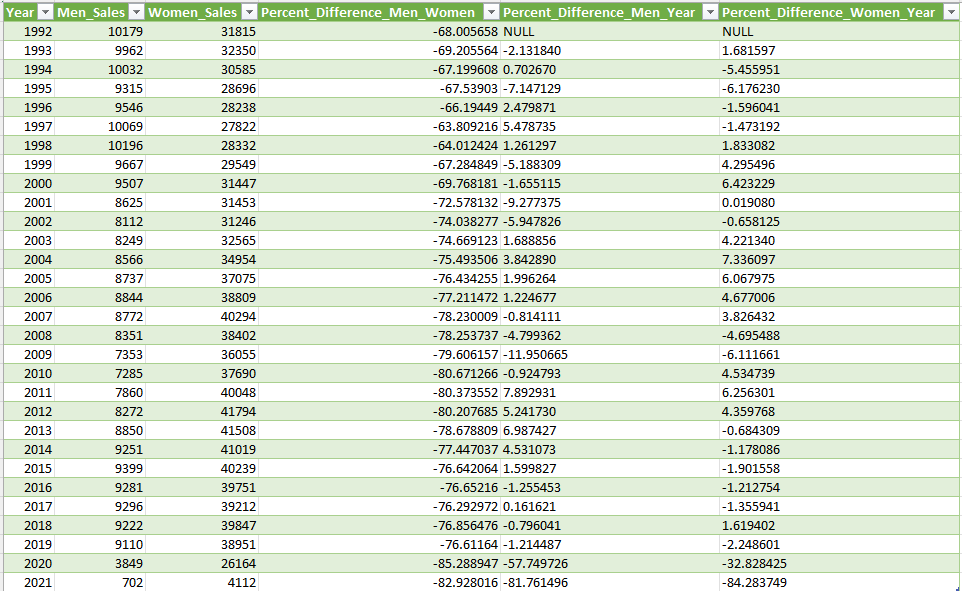

Excel Plot of the Data:

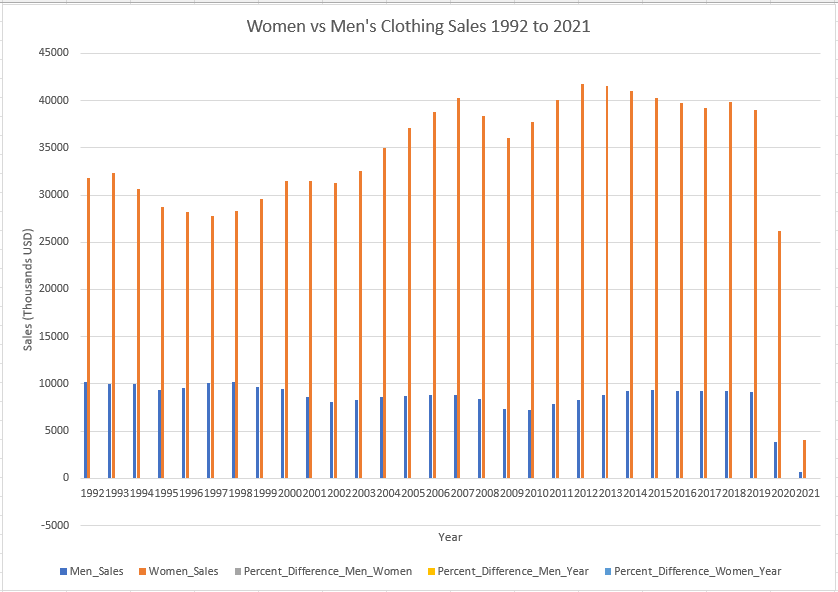

**Men’s Clothing Sales:**

* There is variability in the year-over-year percentage change in men's sales, with some years showing growth and others showing a decline.
* The growth does not show a clear upward or downward trend over the period.

**Women’s Clothing Sales:**

* Women’s clothing sales also fluctuate but display a more consistent pattern of growth, especially noticeable from 1998 onwards.
* The percentage change for women’s sales is predominantly positive, indicating year-over-year growth for most years in the data set.

**Contribution to Total Sales:**

To calculate the contribution of each category to the total sales, you would add men's and women's sales together for each year and then divide each category's sales by this total. For example, for 1992:

Total Sales = Men’s Sales + Women’s Sales = 10179 + 31815 = 41994

Men’s Contribution = (10179/41994) × 100% ≈ 24.24%

Women’s Contribution = (31815/41994) × 100% ≈ 75.76%

This is done for each year and then compared.

**Changes Over Time**

The percentage of contribution for each category to the total sales will fluctuate over time due to:

* Seasonality: Sales might peak during certain seasons, like holidays.
* Economic Fluctuations: During economic downturns, consumers might cut back on non-essential purchases.
* Changes in Demand: New fashion trends can shift demand between the two categories.

**Price Changes:** If the price of one category increases or decreases significantly relative to the other, it can change the percentage contribution.

We can see that women's sales have contributed more significantly to the total, but the steep decline in the plot suggests that this contribution likely decreased dramatically around 2020.

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

For this section, I wrote two scripts, as detailed below, and ran them against (1) the "Retail and Food Services" category that contains multiple business types, and (2) the "Sporting Goods Stores" business type. The scripts will only be explained once.

#### Retail and Food Services

**Rolling Time Window Script 1:**

```
SELECT
    Group_Name,
    Year,
    Month,
    Rolling_Sum,
    Rolling_Average,
    Rolling_Growth_Rate,
    Rolling_Min,
    Rolling_Max
FROM (
    SELECT
        NG.Group_Name,
        MD.Year,
        MD.Month,
        SUM(MD.Value) AS Rolling_Sum,
        AVG(MD.Value) AS Rolling_Average,
        (SUM(MD.Value) - LAG(SUM(MD.Value), 1) OVER (PARTITION BY NG.Group_Name, MD.Year ORDER BY MD.Month)) / LAG(SUM(MD.Value), 1) OVER (PARTITION BY NG.Group_Name, MD.Year ORDER BY MD.Month) AS Rolling_Growth_Rate,
        MIN(MD.Value) AS Rolling_Min,
        MAX(MD.Value) AS Rolling_Max
FROM
    NAIC_Groups NG
JOIN
    NAIC_Group_Mapping NGM ON NG.Group_ID = NGM.Group_ID
JOIN
    NAIC_Codes NC ON NGM.NAIC_Code = NC.NAIC_Code
JOIN
    Monthly_Data MD ON NC.NAIC_Code_ID = MD.NAIC_Code_ID
WHERE
    NG.Group_Name = 'Retail and Food Services' -- Filter for the specific group
GROUP BY
    NG.Group_Name,
    MD.Year,
    MD.Month
) AS Subquery;
```

Calculates and retrieves several rolling metrics for the NAIC grouping named 'Retail and Food Services' from 1992 to 2021, organized by year and month.

**Outer Query**

The outer query selects the following columns from a subquery (described below):

* Group_Name
* Year
* Month
* Rolling_Sum
* Rolling_Average
* Rolling_Growth_Rate
* Rolling_Min
* Rolling_Max

**Subquery**

The subquery calculates the rolling metrics.

**FROM Clauses:**

The query starts by selecting from a table NAIC_Groups, which presumably contains different groups including one called 'Retail and Food Services'.
It then joins this table to NAIC_Group_Mapping on Group_ID to link groups to specific NAIC (North American Industry Classification System) codes.
Next, it joins to the NAIC_Codes table on NAIC_Code to get additional information related to these codes.
Finally, it joins to Monthly_Data on NAIC_Code_ID to fetch the actual data for the calculations, which is monthly.

**WHERE Clause:** This filters the results to include only the 'Retail and Food Services' group.

**SELECT Clauses (inside the subquery):**

Group_Name, Year, and Month are selected directly for grouping and display purposes.
SUM(MD.Value) AS Rolling_Sum: This calculates the total sum of the Value column for each group by year and month.
AVG(MD.Value) AS Rolling_Average: This computes the average of the Value column for each group by year and month.
The Rolling_Growth_Rate is a bit more complex. It uses the LAG window function to calculate the growth rate. It takes the sum of the current month's Value, subtracts the sum of the previous month's Value (achieved by LAG(SUM(MD.Value), 1)), and then divides the result by the previous month's sum to get the growth rate. This is done within the partition of Group_Name and Year, ordered by Month.
MIN(MD.Value) AS Rolling_Min: This finds the minimum value of the Value column for each group by year and month.
MAX(MD.Value) AS Rolling_Max: This finds the maximum value of the Value column for each group by year and month.

**GROUP BY Clause:** The data is grouped by Group_Name, Year, and Month to ensure that the rolling calculations are done for each distinct time period and group.

This query analyzes time-series data related to the retail and food services category. It looks at the sum, average, growth rate, minimum, and maximum values for each month within each year, to track performance metrics like sales. The Rolling_Growth_Rate is particularly useful for understanding how performance is changing over time on a month-to-month basis within each year. This kind of analysis is valuable for identifying trends, seasonality, and other patterns in the data.

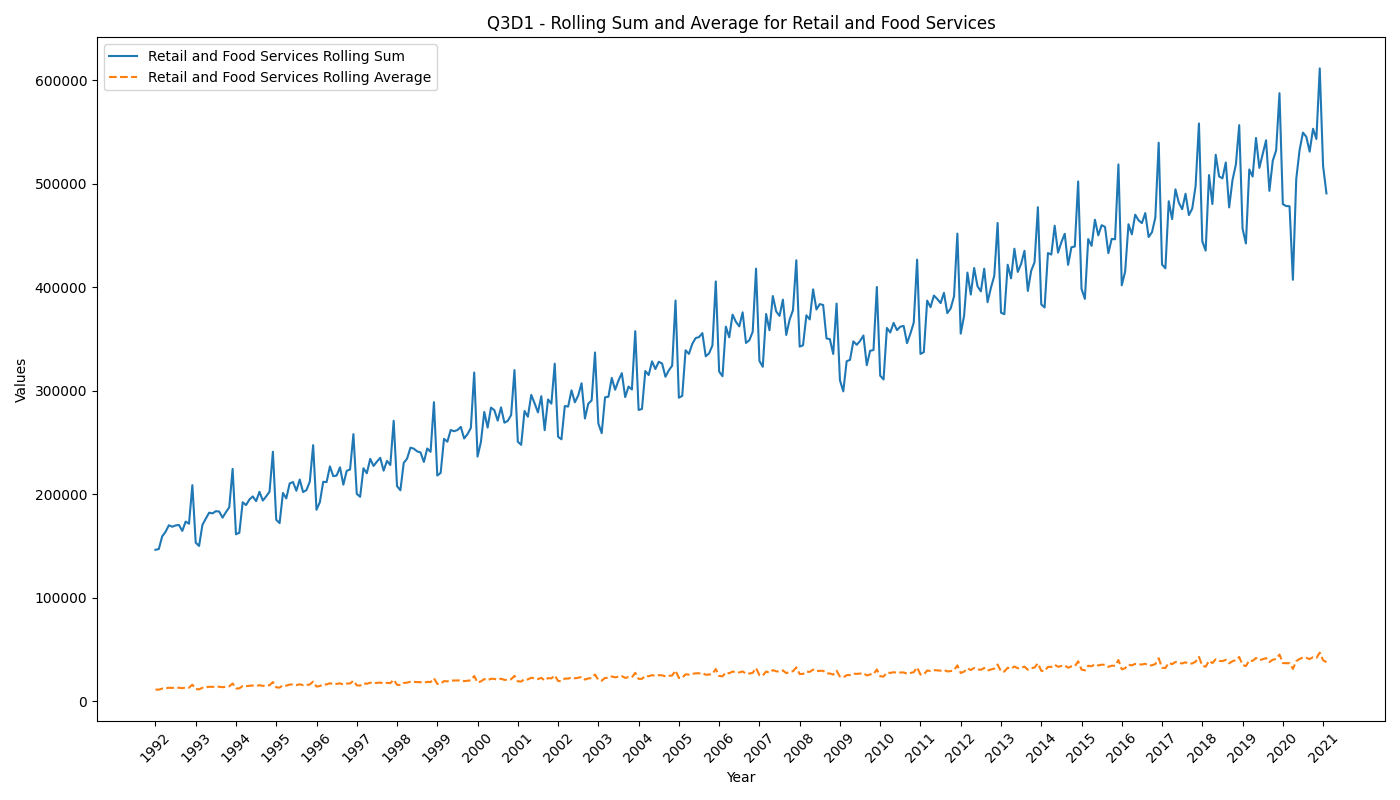


**Summary**

**Blue Solid Line:**
This line represents the "Rolling Sum" of the sales metric being measured. A rolling sum is a cumulative total that is updated regularly, often summing a certain number of periods (like months or quarters) at a time as it moves forward. In this context, it's showing a trend over time of the cumulative metric. The steepness and the fluctuations in the blue line might correspond to various economic or seasonal factors that affect retail and food service sales, such as economic growth, recession periods, holidays, or changes in consumer behavior.

**Orange Dashed Line:**
This line represents the "Rolling Average" of the same metric. A rolling average (or moving average) smooths out short-term fluctuations and highlights longer-term trends or cycles. The rolling average here is essentially flat, which suggests that on average, the metric hasn't changed much when viewed across the entire period. It could be that the rolling average is calculated over the entire time span, which would explain why it appears flat; any variations within shorter time spans would be less visible as it is smoothed.

**Overall Trend:**
The "Rolling Sum" shows a general upward trend, which indicates that the total cumulative sales is increasing over time. There are fluctuations within the trend, with some years showing steep increases (economic crash of 2008, and the pandemic years) and others showing declines or plateaus.

**Rolling Time Window Script 2:**

```
WITH RollingWindow3Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 3) OVER (ORDER BY Year, Month) AS TotalValue_3MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
    ),
     RollingWindow6Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 6) OVER (ORDER BY Year, Month) AS TotalValue_6MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
    ),
     RollingWindow9Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 9) OVER (ORDER BY Year, Month) AS TotalValue_9MonthsAgo
        FROM Monthly_Data
        GROUP BY NAIC_Code_ID, Year, Month
    ),
     RollingWindow12Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 12) OVER (ORDER BY Year, Month) AS TotalValue_12MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
    ),
    FilteredNAICCodes AS (
        SELECT NC.NAIC_Code_ID
        FROM NAIC_Groups NG
        JOIN NAIC_Group_Mapping NGM ON NG.Group_ID = NGM.Group_ID
        JOIN NAIC_Codes NC ON NGM.NAIC_Code = NC.NAIC_Code
         WHERE NG.Group_Name = 'Retail and Food Services'
    ),
    AggregatedData AS (
        SELECT
            M.Year,
            M.Month,
            SUM(M.Value) AS TotalMonthlySales,
            SUM(R3.TotalValue_3MonthsAgo) AS TotalSales_3MonthsAgo,
            SUM(R6.TotalValue_6MonthsAgo) AS TotalSales_6MonthsAgo,
            SUM(R9.TotalValue_9MonthsAgo) AS TotalSales_9MonthsAgo,
            SUM(R12.TotalValue_12MonthsAgo) AS TotalSales_12MonthsAgo
        FROM Monthly_Data M
        JOIN FilteredNAICCodes FNC ON M.NAIC_Code_ID = FNC.NAIC_Code_ID
        LEFT JOIN RollingWindow3Months R3 ON M.NAIC_Code_ID = R3.NAIC_Code_ID AND M.Year = R3.Year AND M.Month = R3.Month
        LEFT JOIN RollingWindow6Months R6 ON M.NAIC_Code_ID = R6.NAIC_Code_ID AND M.Year = R6.Year AND M.Month = R6.Month
        LEFT JOIN RollingWindow9Months R9 ON M.NAIC_Code_ID = R9.NAIC_Code_ID AND M.Year = R9.Year AND M.Month = R9.Month
        LEFT JOIN RollingWindow12Months R12 ON M.NAIC_Code_ID = R12.NAIC_Code_ID AND M.Year = R12.Year AND M.Month = R12.Month
        GROUP BY M.Year, M.Month
    )
SELECT
    Year,
    Month,
    TotalMonthlySales,
    TotalSales_3MonthsAgo,
    TotalSales_6MonthsAgo,
    TotalSales_9MonthsAgo,
    TotalSales_12MonthsAgo
FROM AggregatedData
ORDER BY Year, Month;
```

Calculate the sum of sales ('Value') for retail and food services (as identified by NAIC codes within a specified group 'Retail and Food Services') and compares these sums with the sums from 3, 6, 9, and 12 months previously. The query is divided into several Common Table Expressions (CTEs) for clarity and organization.

**RollingWindow3Months, RollingWindow6Months, RollingWindow9Months, RollingWindow12Months:**

These CTEs calculate the total sales value ('TotalValue') for each NAIC_Code_ID, Year, and Month combination. They use the LAG window function to retrieve the total value from 3, 6, 9, and 12 months prior, respectively.
The LAG function is used within a window defined by ORDER BY Year, Month which ensures that the sales values are being compared with the correct corresponding period from the past.

**FilteredNAICCodes:**

This CTE filters out the specific NAIC codes that belong to the 'Retail and Food Services' group. It joins several tables to map group names to their corresponding NAIC codes.

**AggregatedData:**

This CTE joins the Monthly_Data table with the FilteredNAICCodes to filter down to just the data for 'Retail and Food Services'.
It then left joins this data with each of the RollingWindow CTEs to align the total sales with the values from 3, 6, 9, and 12 months ago.
It groups the results by Year and Month and sums up the values to get the total sales for each month and the total sales for the same month 3, 6, 9, and 12 months ago.

**Final SELECT:**

This is the final query that selects the results from the AggregatedData CTE.
It orders the results by Year and Month, providing a chronological sequence of sales data alongside the historical comparison.

This query allows a user to see trends in the data over time and to make comparisons between current sales and sales from previous periods, which is valuable for identifying seasonal patterns, growth, or decline in sales over a given time period. The ordering by Year and Month ensures the output is in chronological order, making it easier to analyze trends.

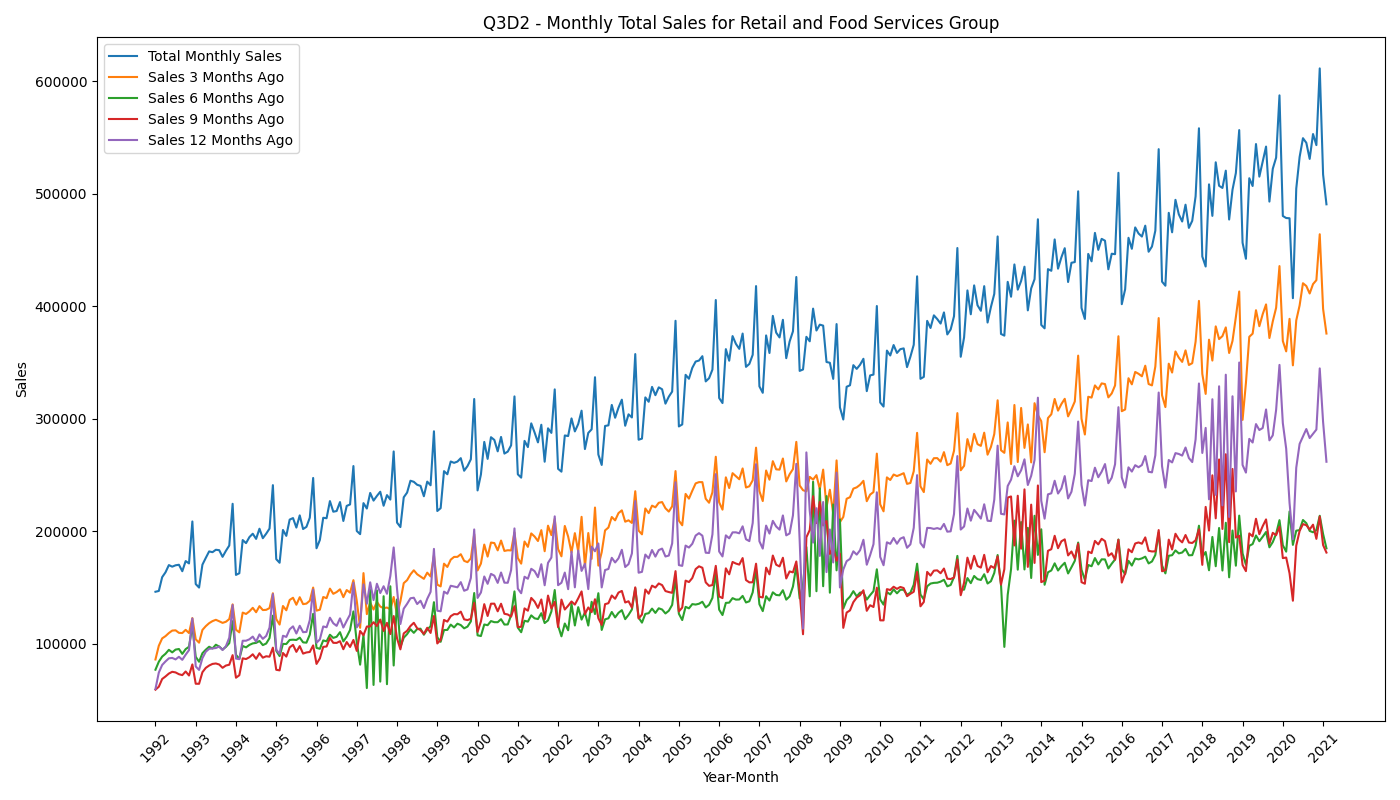


**Summary**

There is a lot happening in the plot. It calculates the total monthly sales for the Retail and Food Services group and compares these values to the sales from 3, 6, 9, and 12 months ago. Each line in the graph represents a different set of sales data:

**Blue line:**
This represents the Total Monthly Sales. It shows a generally increasing trend over the years, with some fluctuations, indicating overall growth in the sales for the Retail and Food Services group. There are noticeable seasonal patterns with peaks and troughs suggesting higher sales in certain months of the year, which could be due to holiday seasons or other periodic factors that affect retail and food service industries.

**Green line:** This shows the Sales from 3 Months Ago. It follows the pattern of the blue line but is offset by three months.

**Orange line:** This indicates the Sales from 6 Months Ago. Similarly, this follows the overall pattern but is offset by six months.

**Red line:** This is the Sales from 9 Months Ago, again following the general trend offset by nine months.

**Purple line:** Finally, the Sales from 12 Months Ago is indicated by this line, which completes the pattern offset by a full year.

**What it tells us:**

* There is clear seasonality in the sales data. This could be useful for planning inventory, staffing, and marketing efforts.

* The distance between the lines at any given point represents the growth or decline in sales over that period. For instance, if the blue line is significantly above the purple line, it suggests that sales have grown year-over-year.

* In some years, the lines converge, which could indicate periods of slower growth or stability.

* Towards the end of the timeline (around 2020-2021), there is significant volatility, which could be indicative of external factors impacting the market, such as economic changes or the effects of the COVID-19 pandemic.

* The overall upward trajectory of the blue line suggests that despite monthly fluctuations and seasonal variations, the total monthly sales for the group have increased over the span of these years.

* The graph could also be used to forecast future sales by analyzing the patterns of growth and seasonal changes. For instance, if the growth rate remains consistent, one might expect future sales to continue increasing along the trajectory set by the blue line.

#### Sporting Goods Stores

**Rolling Time Window Script 1:**

```
SELECT
    Business_Type,
    Year,
    Month,
    Rolling_Sum,
    Rolling_Average,
    Rolling_Growth_Rate,
    Rolling_Min,
    Rolling_Max
FROM (
    SELECT
        NC.Business_Type,
        MD.Year,
        MD.Month,
        SUM(MD.Value) AS Rolling_Sum,
        AVG(MD.Value) AS Rolling_Average,
        (SUM(MD.Value) - LAG(SUM(MD.Value), 1) OVER (PARTITION BY NC.Business_Type, MD.Year ORDER BY MD.Month)) / LAG(SUM(MD.Value), 1) OVER (PARTITION BY NC.Business_Type, MD.Year ORDER BY MD.Month) AS Rolling_Growth_Rate,
        MIN(MD.Value) AS Rolling_Min,
        MAX(MD.Value) AS Rolling_Max
    FROM
        NAIC_Codes NC
    JOIN
        Monthly_Data MD ON NC.NAIC_Code_ID = MD.NAIC_Code_ID
    WHERE
        NC.Business_Type = 'Sporting Goods Stores' -- Direct filter for Sporting Goods Stores
    GROUP BY
        NC.Business_Type,
        MD.Year,
        MD.Month
) AS Subquery
ORDER BY
    Year,
    Month;
```

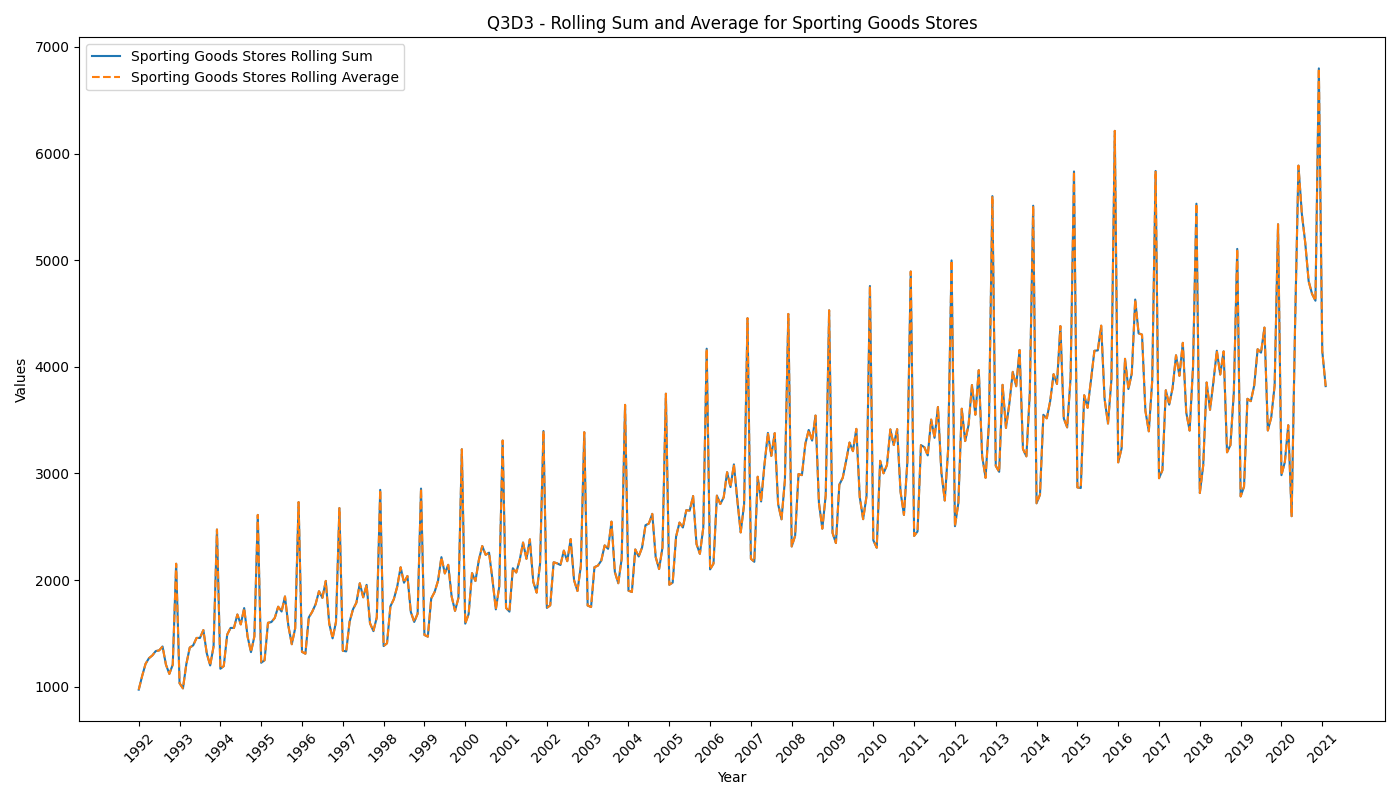

**Summary**

This plot is a rolling time series graph showing two different metrics for "Sporting Goods Stores" over a span of nearly 30 years, from 1992 to 2021. The metrics are represented by a rolling sum and a rolling average of sales volumes.

**Seasonal Patterns:**
Both the rolling sum and rolling average exhibit clear seasonal patterns with regular peaks and troughs each year. This suggests that the sporting goods business has a strong seasonal component, which could be related to specific sports seasons, holidays, or weather patterns.

**Trend:**
There seems to be an overall upward trend in the rolling sum over the years, which may indicate growth in the industry or in the sales of sporting goods over time.

**Rolling Sum vs. Rolling Average:**
The rolling sum (blue line) exhibits much sharper peaks and more pronounced variation than the rolling average (orange dashed line). The rolling average smooths out these fluctuations, which could indicate that although there are seasonal spikes in sales, the overall longer-term trend is more stable.

**Economic Events:** 
Specific years, 2008 and 2020 show anomalies due to economic events (the economic crash and the pandemic). 

**Data Aggregation:** 
The use of rolling windows for sum and average would be to smooth out short-term fluctuations and highlight longer-term trends and patterns.

**Data Issue in 2021:**
The last data point shows a significant drop, which is due to incomplete data for the year 2021.


**Rolling Time Window Script 1:**

```
WITH RollingWindow3Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 3) OVER (ORDER BY Year, Month) AS TotalValue_3MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
),
RollingWindow6Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 6) OVER (ORDER BY Year, Month) AS TotalValue_6MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
),
RollingWindow9Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 9) OVER (ORDER BY Year, Month) AS TotalValue_9MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
),
RollingWindow12Months AS (
    SELECT
        NAIC_Code_ID,
        Year,
        Month,
        SUM(Value) AS TotalValue,
        LAG(SUM(Value), 12) OVER (ORDER BY Year, Month) AS TotalValue_12MonthsAgo
    FROM Monthly_Data
    GROUP BY NAIC_Code_ID, Year, Month
),
FilteredNAICCodes AS (
    SELECT NAIC_Code_ID
    FROM NAIC_Codes
    WHERE Business_Type = 'Sporting Goods Stores' -- Changed to filter based on the Business_Type field
),
AggregatedData AS (
    SELECT
        M.Year,
        M.Month,
        SUM(M.Value) AS TotalMonthlySales,
        SUM(R3.TotalValue_3MonthsAgo) AS TotalSales_3MonthsAgo,
        SUM(R6.TotalValue_6MonthsAgo) AS TotalSales_6MonthsAgo,
        SUM(R9.TotalValue_9MonthsAgo) AS TotalSales_9MonthsAgo,
        SUM(R12.TotalValue_12MonthsAgo) AS TotalSales_12MonthsAgo
    FROM Monthly_Data M
    JOIN FilteredNAICCodes FNC ON M.NAIC_Code_ID = FNC.NAIC_Code_ID
    LEFT JOIN RollingWindow3Months R3 ON M.NAIC_Code_ID = R3.NAIC_Code_ID AND M.Year = R3.Year AND M.Month = R3.Month
    LEFT JOIN RollingWindow6Months R6 ON M.NAIC_Code_ID = R6.NAIC_Code_ID AND M.Year = R6.Year AND M.Month = R6.Month
    LEFT JOIN RollingWindow9Months R9 ON M.NAIC_Code_ID = R9.NAIC_Code_ID AND M.Year = R9.Year AND M.Month = R9.Month
    LEFT JOIN RollingWindow12Months R12 ON M.NAIC_Code_ID = R12.NAIC_Code_ID AND M.Year = R12.Year AND M.Month = R12.Month
    GROUP BY M.Year, M.Month
)
SELECT
    Year,
    Month,
    TotalMonthlySales,
    TotalSales_3MonthsAgo,
    TotalSales_6MonthsAgo,
    TotalSales_9MonthsAgo,
    TotalSales_12MonthsAgo
FROM AggregatedData
ORDER BY Year, Month;
```

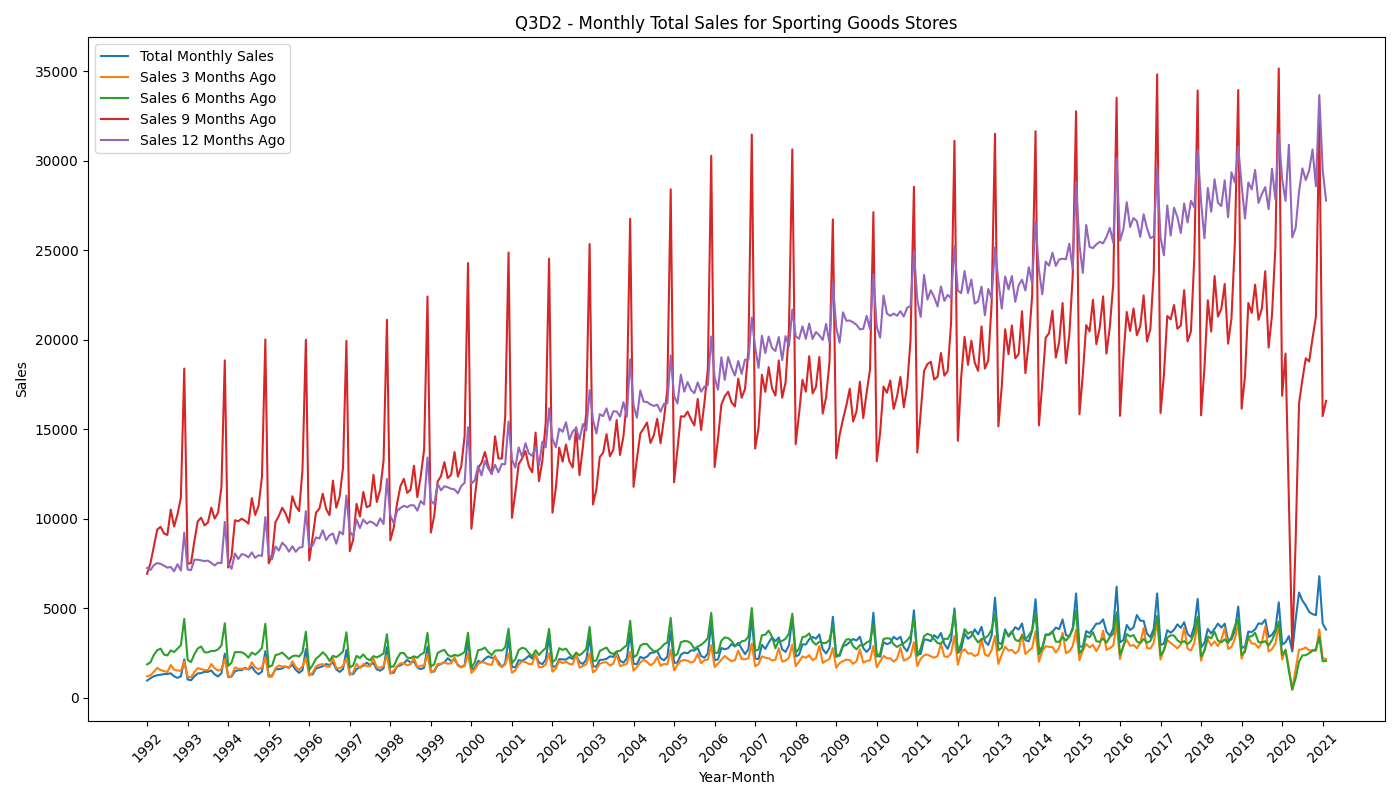


**Summary**

This plot shows the monthly total sales for sporting goods stores from 1992 to 2021 along with sales data from 3, 6, 9, and 12 months prior. 

**Trend Over Time:**
The blue line (total monthly sales) shows a general upward trend over the period, suggesting that the sporting goods sector has grown over these three decades.

**Seasonality:**
There is a clear seasonal pattern, with peaks and troughs repeating annually. This is consistent with how consumer purchasing behavior often changes with seasons, perhaps influenced by sports seasons, holidays, or weather conditions.

**Comparative Sales:**
The lines representing sales 3, 6, 9, and 12 months ago seem to follow the same overall trend and seasonality, but they are staggered. Each line is a step behind the blue line in terms of time, showing what the sales looked like at each of these intervals in the past.

**Historical Context:**
The pattern of all lines appears quite consistent, with the expected lag reflecting the time shift. This lagged data might be used for forecasting future sales, understanding seasonal impacts, or analyzing the sales growth trend.

**Recent Sales Drop:**
At the far right of the plot, there is a noticeable drop in the total monthly sales line (blue). This could reflect the impact of the COVID-19 pandemic, and for 2021 incomplete data.

**Lag Effect:** The distance between the lines at any given point can give an insight into the growth rate over these periods. For example, if the blue line is much higher than the purple line (sales 12 months ago), it suggests significant year-over-year growth.

**Analysis Use:** This plot could be useful for comparative analysis, to assess not just how sales figures are changing, but how the rate of change itself varies over time.


### Subsection Conclusion:

**In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?**

A rolling time window, also known as a moving or rolling window analysis, refers to a method of analysis that uses a subset of data from a larger dataset to conduct calculations over a specified period. This window of data "rolls" over time, continuously moving forward by a fixed interval. For instance, a 12-month rolling window analysis would examine data from the past year, and as a new month of data becomes available, the window shifts to drop the oldest month and include the newest one.

This approach is considered important for several reasons:

**Smoothing:** It helps in smoothing out short-term fluctuations and highlighting longer-term trends or cycles in the data. This is particularly useful for noisy data where short-term volatility can obscure underlying patterns.

**Seasonality Adjustment:** Rolling windows can be used to adjust for seasonality, as they allow for the comparison of a point with its equivalent in the previous cycle (e.g., comparing sales in June of this year with sales in June of last year).

**Responsiveness:** It is more responsive to recent changes than other methods like cumulative or year-to-date analyses, which can be heavily influenced by older data.

**Forecasting:** For predictive models, rolling windows can be very useful because they provide a more dynamic look at trends and patterns, which can improve forecasting accuracy for future values, such as spending patterns.

**Anomaly Detection:** Rolling windows can also help identify anomalies or outliers that may represent errors in data collection or genuine deviations from the norm.

Rolling window calculations are widely used in econometrics and time series analysis, particularly in the analysis of financial markets and economic indicators. They are also applied in various statistical and machine learning models to predict economic and financial quantities.[4]

**Consider at least two businesses of your own from the MRTS data.**

The two sets of rolling time plots examine the same metrics for a specific business type, and for the overall economic group that business is a member of in the economy. The first set gives an overview of the "Retail and Food Services" sector, capturing a range of businesses. This is set against a detailed look at sporting goods stores to compare specific business data with the sector as a whole.

The graphs draw from the MRTS dataset, showing the sales data from 1992 to 2021 (incomplete). These figures are averaged over time to give a clearer picture of consumer behavior, seasonal buying, and long-term trends. This information helps with business planning.

The data shows how economic changes affect consumer spending, with peaks possibly during holidays or sales and lows during downturns. There may be biases due to different ways data is collected among businesses.

The information helps analysts and retail managers make decisions about inventory, staffing, and marketing. It shows sales trends and seasonal patterns, which are essential for predicting future demand. However, the data has its limitations and should be seen as part of a broader economic picture.

### Visualization Code

The following is the code for the visualization python script.

```
import mysql.connector
import easygui
import yaml
import matplotlib.pyplot as plt

def load_mysql_config(config_path):
    try:
        with open(config_path, 'r') as f:
            db = yaml.safe_load(f)
            required_keys = ['user', 'pwrd', 'host']
            
            if all(key in db for key in required_keys):
                return {
                    'user': db['user'],
                    'password': db['pwrd'],
                    'host': db['host'],
                    'auth_plugin': 'mysql_native_password',
                    'database': 'mrts'  # Specify the 'mrts' database here
                }
            else:
                raise ValueError("Invalid MySQL configuration file. Missing required keys.")
    except FileNotFoundError:
        raise FileNotFoundError("Configuration file not found.")
    except yaml.YAMLError:
        raise ValueError("Invalid YAML format in the configuration file.")

def check_database_existence(cursor):
    cursor.execute("SHOW DATABASES LIKE 'mrts'")
    return cursor.fetchone() is not None

def main():
    cnx = None  # Initialize connection outside of try block
    cursor = None  # Initialize cursor outside of try block
    
    try:
        # Prompt user to select the .yaml configuration file
        config_path = easygui.fileopenbox(title="Select your database configuration file", filetypes=['*.yaml'])

        # Load MySQL configuration from the selected yaml file
        config = load_mysql_config(config_path)

        # Connect to MySQL to check if the database exists
        cnx = mysql.connector.connect(**config)
        cursor = cnx.cursor()

        if not check_database_existence(cursor):
            # Database does not exist
            print("Database does not exist, please run the installation script")
        else:
            # Database exists, proceed with the rest of the script

            # Q3A1: Run SQL Statement for time series plot
            sql = """
            SELECT 
                CONCAT(Monthly_Data.Year, '-', LPAD(Monthly_Data.Month, 2, '0'), '-01') AS date_formatted, 
                CAST(SUM(Monthly_Data.Value) AS UNSIGNED) AS sales
            FROM 
                Monthly_Data 
            JOIN 
                NAIC_Codes ON Monthly_Data.NAIC_Code_ID = NAIC_Codes.NAIC_Code_ID
            JOIN
                NAIC_Group_Mapping ON NAIC_Codes.NAIC_Code = NAIC_Group_Mapping.NAIC_Code
            JOIN
                NAIC_Groups ON NAIC_Group_Mapping.Group_ID = NAIC_Groups.Group_ID
            WHERE 
                NAIC_Groups.Group_Name = 'Retail and Food Services'
            GROUP BY 
                Monthly_Data.Year, Monthly_Data.Month
            ORDER BY 
                ABS(Monthly_Data.Year - 2021), Monthly_Data.Year DESC, Monthly_Data.Month DESC;
            """

            cursor.execute(sql)

            month = []
            sales = []

            # Print all the first cells for all of the rows
            for row in cursor.fetchall():
                month.append(row[0])
                sales.append(row[1])

            # Extract unique years from the data
            unique_years = set(date.split('-')[0] for date in month)

            # Plot as a time series with year separators on the x-axis
            plt.figure(figsize=(14, 8))
            plt.plot(month[::-1], sales[::-1])  # Reverse the lists to change direction
            plt.title("Q3A1 - Retail and Food Services Monthly Totals")  # Title
            plt.xlabel("Years")  # X-axis label
            plt.ylabel("Sales")  # Y-axis label
            plt.xticks([f"{year}-01-01" for year in sorted(unique_years, reverse=True)], sorted(unique_years, reverse=True), rotation=45)
            plt.tight_layout()  # Ensure labels fit in the plot area
            plt.show()

            # Q3A1a: Run SQL Statement for moving averages
            moving_avg_sql = """
            WITH MovingAverages AS (
                SELECT
                    Monthly_Data.Year,
                    Monthly_Data.Month,
                    SUM(Monthly_Data.Value) AS TotalSales,
                    AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS ThreeMonthAvg,
                    AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 5 PRECEDING AND CURRENT ROW) AS SixMonthAvg,
                    AVG(SUM(Monthly_Data.Value)) OVER (ORDER BY Monthly_Data.Year, Monthly_Data.Month ROWS BETWEEN 11 PRECEDING AND CURRENT ROW) AS TwelveMonthAvg
                FROM
                    Monthly_Data
                JOIN 
                    NAIC_Codes ON Monthly_Data.NAIC_Code_ID = NAIC_Codes.NAIC_Code_ID
                JOIN
                    NAIC_Group_Mapping ON NAIC_Codes.NAIC_Code = NAIC_Group_Mapping.NAIC_Code
                JOIN
                    NAIC_Groups ON NAIC_Group_Mapping.Group_ID = NAIC_Groups.Group_ID
                WHERE
                    NAIC_Groups.Group_Name = 'Retail and Food Services'
                GROUP BY
                    Monthly_Data.Year, Monthly_Data.Month
            )
            SELECT
                Year,
                Month,
                TotalSales,
                ThreeMonthAvg,
                SixMonthAvg,
                TwelveMonthAvg
            FROM
                MovingAverages
            ORDER BY
                Year, Month;
            """

            cursor.execute(moving_avg_sql)

            # Initialize lists to store moving average data
            ma_dates = []
            ma_3months = []
            ma_6months = []
            ma_12months = []

            # Fetch and process the moving average data
            for row in cursor.fetchall():
                ma_dates.append(f"{row[0]}-{row[1]:02d}")
                ma_3months.append(row[3])
                ma_6months.append(row[4])
                ma_12months.append(row[5])

            # Plot moving averages
            plt.figure(figsize=(14, 8))
            plt.plot(ma_dates, ma_3months, label='3-Month Avg')
            plt.plot(ma_dates, ma_6months, label='6-Month Avg')
            plt.plot(ma_dates, ma_12months, label='12-Month Avg')
            plt.title("Q3A1a - Retail and Food Services Moving Averages")  # Title
            plt.xlabel("Years")  # X-axis label
            plt.ylabel("Sales")  # Y-axis label
            # Adjust the x-axis tick positions and labels
            tick_positions = list(range(0, len(ma_dates), len(unique_years)))
            tick_labels = [ma_dates[i] for i in tick_positions]

            plt.xticks(tick_positions, tick_labels, rotation=45)
            plt.legend()
            plt.tight_layout()
            plt.show()

            # Q3A1b - Run SQL Statement for Quarterly Sales of 'Retail and Food Services' NAIC group
            quarterly_sales_sql = """
            WITH QuarterlySales AS (
                SELECT
                    md.Year AS Year,
                    CASE
                        WHEN md.Month BETWEEN 1 AND 3 THEN 'Q1'
                        WHEN md.Month BETWEEN 4 AND 6 THEN 'Q2'
                        WHEN md.Month BETWEEN 7 AND 9 THEN 'Q3'
                        WHEN md.Month BETWEEN 10 AND 12 THEN 'Q4'
                    END AS Quarter,
                    SUM(md.Value) AS QuarterlyTotal
                FROM
                    Monthly_Data md
                JOIN
                    NAIC_Codes nc ON md.NAIC_Code_ID = nc.NAIC_Code_ID
                JOIN
                    NAIC_Group_Mapping ngm ON nc.NAIC_Code = ngm.NAIC_Code
                JOIN
                    NAIC_Groups ng ON ngm.Group_ID = ng.Group_ID
                WHERE
                    ng.Group_Name = 'Retail and Food Services'
                GROUP BY
                    md.Year, Quarter
            )
            SELECT
                Year,
                Quarter,
                SUM(QuarterlyTotal) AS QuarterlySales
            FROM
                QuarterlySales
            GROUP BY
                Year, Quarter
            ORDER BY
                Year, Quarter;
            """

            cursor.execute(quarterly_sales_sql)

            qs_years = []
            qs_quarters = []
            qs_sales = []

            # Fetch and process the quarterly sales data
            for row in cursor.fetchall():
                qs_years.append(row[0])
                qs_quarters.append(row[1])
                qs_sales.append(row[2])

            # Extract unique years from the data
            unique_years_quarterly = sorted(set(qs_years))

            # Create an empty list for quarterly sales corresponding to each unique year
            qs_sales_by_year = [0] * len(unique_years_quarterly)

            # Populate the quarterly sales data in the correct positions
            for year, quarter, sales in zip(qs_years, qs_quarters, qs_sales):
                year_index = unique_years_quarterly.index(year)
                if quarter == 'Q1':
                    qs_sales_by_year[year_index] += sales
                elif quarter == 'Q2':
                    qs_sales_by_year[year_index] += sales
                elif quarter == 'Q3':
                    qs_sales_by_year[year_index] += sales
                elif quarter == 'Q4':
                    qs_sales_by_year[year_index] += sales

            # Plot Quarterly Sales as a time series with years on the x-axis
            plt.figure(figsize=(14, 8))
            plt.plot(unique_years_quarterly, qs_sales_by_year, marker='o', linestyle='-', label='Quarterly Sales')
            plt.title("Q3A1b - Retail and Food Services Quarterly Sales")  # Title
            plt.xlabel("Years")  # X-axis label
            plt.ylabel("Sales")  # Y-axis label
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

            # Q3B1: First SQL query for total sales
            cursor.execute("""
                SELECT
                    NC.Business_Type,
                    SUM(MD.Value) AS TotalSales
                FROM
                    Monthly_Data MD
                JOIN
                    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
                WHERE
                    NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
                GROUP BY
                    NC.Business_Type
                ORDER BY
                    TotalSales DESC;
            """)
            results = cursor.fetchall()
            business_types = [result[0] for result in results]
            sales = [result[1] for result in results]

            # Set the size of the plot
            plt.figure(figsize=(14, 8))

            # Create the bar plot
            plt.bar(business_types, sales)

            # Set the title and labels
            plt.title('Q3B1 - Total Sales by Business Type')
            plt.xlabel('Business Type')
            plt.ylabel('Total Sales')

            # Display the plot
            plt.show()

            # Q3B2 - Second SQL query for yearly growth rate
            cursor.execute("""
                WITH YearlySales AS (
                    SELECT
                        NC.Business_Type,
                        MD.Year,
                        SUM(MD.Value) AS TotalSales,
                        LAG(SUM(MD.Value)) OVER(PARTITION BY NC.Business_Type ORDER BY MD.Year) AS PrevTotalSales
                    FROM
                        Monthly_Data MD
                    JOIN
                        NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
                    WHERE
                        MD.Year BETWEEN 1992 AND 2020
                        AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
                    GROUP BY
                        NC.Business_Type, MD.Year
                )
                
                SELECT
                    Business_Type,
                    Year,
                    CASE 
                        WHEN PrevTotalSales = 0 OR PrevTotalSales IS NULL THEN NULL
                        ELSE (TotalSales - PrevTotalSales) / PrevTotalSales * 100
                    END AS GrowthRate
                FROM
                    YearlySales
                WHERE 
                    PrevTotalSales IS NOT NULL
                ORDER BY 
                    Business_Type, 
                    Year;
            """)
            growth_results = cursor.fetchall()

            # Extract the data into usable format for plotting
            years = list(set(row[1] for row in growth_results))
            years.sort()

            business_types_growth = list(set(row[0] for row in growth_results))
            growth_data = {business: [] for business in business_types_growth}

            for row in growth_results:
                business, year, growth_rate = row
                growth_data[business].append(growth_rate)

            # Set the figure size before any plotting
            plt.figure(figsize=(14, 8))

            # Plot growth rate over years
            for business, growth_rates in growth_data.items():
                plt.plot(years, growth_rates, label=business)

            # Now add the plot elements
            plt.title('Q3B2 - Yearly Growth Rate by Business Type')
            plt.xlabel('Year')
            plt.ylabel('Growth Rate (%)')
            plt.legend(loc="lower left")
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)

            # Make sure the layout is tight so everything fits well
            plt.tight_layout()

            # Finally, display the plot
            plt.show()

            # Q3B3 - SQL query for yearly sales by business type and year
            cursor.execute("""
                SELECT
                    MD.Year,
                    NC.Business_Type,
                    SUM(MD.Value) AS TotalSales
                FROM
                    Monthly_Data MD
                JOIN
                    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
                WHERE
                    MD.Year BETWEEN 1992 AND 2020
                    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
                GROUP BY
                    MD.Year, NC.Business_Type
                ORDER BY
                    NC.Business_Type, MD.Year;
            """)
            yearly_sales_results = cursor.fetchall()
            
            # Extract the data into usable format for plotting
            years = sorted(list(set(row[0] for row in yearly_sales_results)))
            business_types_yearly = list(set(row[1] for row in yearly_sales_results))
            sales_data = {business: [0]*len(years) for business in business_types_yearly}

            # Set the figure size before plotting
            plt.figure(figsize=(14, 8))

            for row in yearly_sales_results:
                year, business, total_sales = row
                idx = years.index(year)
                sales_data[business][idx] = total_sales

            for business, yearly_sales in sales_data.items():
                plt.plot(years, yearly_sales, label=business)

            plt.title('Q3B3 - Yearly Sales by Business Type')
            plt.xlabel('Year')
            plt.ylabel('Total Sales')
            plt.legend(loc="upper left")
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)

            # Ensure the layout is tight so everything fits well
            plt.tight_layout()

            # Display the plot
            plt.show()

            # Q3B4 - SQL query for quarterly sales over time
            cursor.execute("""
                SELECT
                    MD.Year,
                    NC.Business_Type,
                    SUM(CASE 
                        WHEN MD.Month BETWEEN 1 AND 3 THEN MD.Value
                        ELSE 0
                        END) AS Q1_Sales,
                    SUM(CASE 
                        WHEN MD.Month BETWEEN 4 AND 6 THEN MD.Value
                        ELSE 0
                        END) AS Q2_Sales,
                    SUM(CASE 
                        WHEN MD.Month BETWEEN 7 AND 9 THEN MD.Value
                        ELSE 0
                        END) AS Q3_Sales,
                    SUM(CASE 
                        WHEN MD.Month BETWEEN 10 AND 12 THEN MD.Value
                        ELSE 0
                        END) AS Q4_Sales
                FROM
                    Monthly_Data MD
                JOIN
                    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
                WHERE
                    MD.Year BETWEEN 1992 AND 2021
                    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
                GROUP BY
                    MD.Year, NC.Business_Type
                ORDER BY
                    MD.Year, NC.Business_Type;
            """)
            
            quarterly_sales_results = cursor.fetchall()
            
            # Structuring the data for stacked column plotting
            years = sorted(list(set(row[0] for row in quarterly_sales_results)))
            business_types_quarterly = list(set(row[1] for row in quarterly_sales_results))
            
            quarterly_sales_data = {business: {"Q1": [0]*len(years), "Q2": [0]*len(years), "Q3": [0]*len(years), "Q4": [0]*len(years)} for business in business_types_quarterly}
            
            for row in quarterly_sales_results:
                year, business, q1_sales, q2_sales, q3_sales, q4_sales = row
                idx = years.index(year)
                quarterly_sales_data[business]["Q1"][idx] = q1_sales
                quarterly_sales_data[business]["Q2"][idx] = q2_sales
                quarterly_sales_data[business]["Q3"][idx] = q3_sales
                quarterly_sales_data[business]["Q4"][idx] = q4_sales
            
            # Plotting the stacked column chart
            width = 0.35  # Width of the bars
            plt.figure(figsize=(14, 8))
            
            for idx, business in enumerate(business_types_quarterly):
                if idx == 0:
                    bottom = [0] * len(years)
                else:
                    prev_business = business_types_quarterly[idx - 1]
                    bottom = [sum(x) for x in zip(quarterly_sales_data[prev_business]["Q1"], quarterly_sales_data[prev_business]["Q2"], quarterly_sales_data[prev_business]["Q3"], quarterly_sales_data[prev_business]["Q4"])]
                
                plt.bar(years, quarterly_sales_data[business]["Q1"], width, label=f"{business} Q1", bottom=bottom)
                bottom = [a+b for a, b in zip(bottom, quarterly_sales_data[business]["Q1"])]
                
                plt.bar(years, quarterly_sales_data[business]["Q2"], width, label=f"{business} Q2", bottom=bottom)
                bottom = [a+b for a, b in zip(bottom, quarterly_sales_data[business]["Q2"])]
                
                plt.bar(years, quarterly_sales_data[business]["Q3"], width, label=f"{business} Q3", bottom=bottom)
                bottom = [a+b for a, b in zip(bottom, quarterly_sales_data[business]["Q3"])]
                
                plt.bar(years, quarterly_sales_data[business]["Q4"], width, label=f"{business} Q4", bottom=bottom)
            
            plt.title('Q3B4 - Quarterly Sales Over Time by Business Type')
            plt.xlabel('Year')
            plt.ylabel('Quarterly Sales')
            plt.legend(loc="upper left")
            plt.tight_layout()
            plt.show()

            # Q3B5 - SQL query for Sales in 2020 and Average Percentage Increase
            cursor.execute("""
                SELECT
                    NC.Business_Type,
                    SUM(CASE 
                        WHEN MD.Year = 2020 THEN MD.Value
                        ELSE 0
                        END) AS Sales_2020,
                    ROUND(
                        AVG(CASE 
                            WHEN MD.Year <> 2020 THEN (MD.Value - PrevYear.Value) / PrevYear.Value * 100
                            ELSE NULL
                            END), 2
                    ) AS Avg_Percentage_Increase
                FROM
                    Monthly_Data MD
                JOIN
                    NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
                LEFT JOIN
                    Monthly_Data PrevYear ON MD.NAIC_Code_ID = PrevYear.NAIC_Code_ID AND MD.Year = PrevYear.Year + 1
                WHERE
                    MD.Year BETWEEN 1992 AND 2020
                    AND NC.Business_Type IN ('Book stores', 'Sporting Goods Stores', 'Hobby, Toy, and Game Stores')
                GROUP BY
                    NC.Business_Type
                ORDER BY
                    NC.Business_Type;
            """)
            sales_avg_results = cursor.fetchall()

            # Extract data for plotting
            business_types = [result[0] for result in sales_avg_results]
            sales_2020 = [result[1] for result in sales_avg_results]
            avg_percentage_increase = [result[2] for result in sales_avg_results]

            # Plot the combined bar chart
            fig, ax1 = plt.subplots(figsize=(14, 8))
            
            # Twin the axes
            ax2 = ax1.twinx()
            
            # Plot data
            ax1.bar(business_types, sales_2020, color='g', label="Sales 2020")
            ax2.plot(business_types, avg_percentage_increase, color='b', marker='o', label="Avg % Increase")
            
            # Set the y axis label
            ax1.set_ylabel('Sales 2020', color='g')
            ax2.set_ylabel('Average % Increase', color='b')

            # Title and show the plot
            plt.title('Q3B5 - Sales 2020 and Average Percentage Increase by Business Type')
            fig.tight_layout()
            plt.show()

            # Q3C1 - Clothing Comparisons:
            sql_query = """
            SELECT
                MD.Year,
                SUM(CASE 
                    WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
                    ELSE 0
                END) AS Men_Sales,
                SUM(CASE 
                    WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                    ELSE 0
                END) AS Women_Sales,
                (SUM(CASE 
                    WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
                    ELSE 0
                END) - SUM(CASE 
                        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                        ELSE 0
                    END)) / SUM(CASE 
                        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                        ELSE 0
                    END) * 100 AS Percent_Difference_Men_Women,
                (SUM(CASE 
                    WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
                    ELSE 0
                END) - LAG(SUM(CASE 
                        WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
                        ELSE 0
                        END), 1) OVER (ORDER BY MD.Year)) / LAG(SUM(CASE 
                            WHEN NC.Business_Type = "Men's clothing stores" THEN MD.Value
                            ELSE 0
                        END), 1) OVER (ORDER BY MD.Year) * 100 AS Percent_Difference_Men_Year,
                (SUM(CASE 
                    WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                    ELSE 0
                END) - LAG(SUM(CASE 
                        WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                        ELSE 0
                        END), 1) OVER (ORDER BY MD.Year)) / LAG(SUM(CASE 
                            WHEN NC.Business_Type = "Women's clothing stores" THEN MD.Value
                            ELSE 0
                        END), 1) OVER (ORDER BY MD.Year) * 100 AS Percent_Difference_Women_Year
            FROM
                Monthly_Data MD
            JOIN
                NAIC_Codes NC ON MD.NAIC_Code_ID = NC.NAIC_Code_ID
            WHERE
                MD.Year BETWEEN 1992 AND 2021
                AND (NC.Business_Type = "Men's clothing stores" OR NC.Business_Type = "Women's clothing stores")
            GROUP BY
                MD.Year
            ORDER BY
                MD.Year;
            """
            cursor.execute(sql_query)
            result = cursor.fetchall()

            # Assuming the result is a list of tuples like [(Year, Men_Sales, Women_Sales), (...), ...]
            years = [row[0] for row in result]
            men_sales = [row[1] for row in result]
            women_sales = [row[2] for row in result]

            # Plotting the results
            plt.figure(figsize=(14, 8))
            plt.plot(years, men_sales, label="Men's Sales")
            plt.plot(years, women_sales, label="Women's Sales")
            plt.xlabel('Year')
            plt.ylabel('Sales')
            plt.title('Q3C1 - Sales Over Years by Gender')
            plt.legend()
            plt.show()

            # Q3D1: SQL Query for Retail and Food Services group only
            sql_query = """
            SELECT
                Group_Name,
                Year,
                Month,
                Rolling_Sum,
                Rolling_Average,
                Rolling_Growth_Rate,
                Rolling_Min,
                Rolling_Max
            FROM (
                SELECT
                    NG.Group_Name,
                    MD.Year,
                    MD.Month,
                    SUM(MD.Value) AS Rolling_Sum,
                    AVG(MD.Value) AS Rolling_Average,
                    (SUM(MD.Value) - LAG(SUM(MD.Value), 1) OVER (PARTITION BY NG.Group_Name, MD.Year ORDER BY MD.Month)) / LAG(SUM(MD.Value), 1) OVER (PARTITION BY NG.Group_Name, MD.Year ORDER BY MD.Month) AS Rolling_Growth_Rate,
                    MIN(MD.Value) AS Rolling_Min,
                    MAX(MD.Value) AS Rolling_Max
                FROM
                    NAIC_Groups NG
                JOIN
                    NAIC_Group_Mapping NGM ON NG.Group_ID = NGM.Group_ID
                JOIN
                    NAIC_Codes NC ON NGM.NAIC_Code = NC.NAIC_Code
                JOIN
                    Monthly_Data MD ON NC.NAIC_Code_ID = MD.NAIC_Code_ID
                WHERE
                    NG.Group_Name = 'Retail and Food Services' -- Filter for the specific group
                GROUP BY
                    NG.Group_Name,
                    MD.Year,
                    MD.Month
            ) AS Subquery;
            """

            cursor.execute(sql_query)
            rows = cursor.fetchall()

            # Assuming the "Retail and Food Services" group exists, there will only be one group's data
            # Unpack the fetched data for plotting
            year_months, rolling_sums, rolling_averages = zip(*[(f"{row[1]}-{str(row[2]).zfill(2)}", row[3], row[4]) for row in rows])

            # Extract unique years from the dates
            unique_years = sorted(set(date.split('-')[0] for date in year_months))

            # Plot the data
            plt.figure(figsize=(14, 8))
            plt.plot(year_months, rolling_sums, label='Retail and Food Services Rolling Sum')
            plt.plot(year_months, rolling_averages, label='Retail and Food Services Rolling Average', linestyle='--')

            plt.xlabel('Year')
            plt.ylabel('Values')
            plt.title('Q3D1 - Rolling Sum and Average for Retail and Food Services')
            plt.legend()

            # Set xticks to only the unique years, positioning them at the start of each year (assuming January data is present)
            plt.xticks([f"{year}-01" for year in unique_years], unique_years)

            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        # Q3D2: Modified SQL Query for Retail and Food Services group only
        sql_query = """
        WITH RollingWindow3Months AS (
            SELECT
                NAIC_Code_ID,
                Year,
                Month,
                SUM(Value) AS TotalValue,
                LAG(SUM(Value), 3) OVER (ORDER BY Year, Month) AS TotalValue_3MonthsAgo
            FROM Monthly_Data
            GROUP BY NAIC_Code_ID, Year, Month
        ),
        RollingWindow6Months AS (
            SELECT
                NAIC_Code_ID,
                Year,
                Month,
                SUM(Value) AS TotalValue,
                LAG(SUM(Value), 6) OVER (ORDER BY Year, Month) AS TotalValue_6MonthsAgo
            FROM Monthly_Data
            GROUP BY NAIC_Code_ID, Year, Month
        ),
        RollingWindow9Months AS (
            SELECT
                NAIC_Code_ID,
                Year,
                Month,
                SUM(Value) AS TotalValue,
                LAG(SUM(Value), 9) OVER (ORDER BY Year, Month) AS TotalValue_9MonthsAgo
            FROM Monthly_Data
            GROUP BY NAIC_Code_ID, Year, Month
        ),
        RollingWindow12Months AS (
            SELECT
                NAIC_Code_ID,
                Year,
                Month,
                SUM(Value) AS TotalValue,
                LAG(SUM(Value), 12) OVER (ORDER BY Year, Month) AS TotalValue_12MonthsAgo
            FROM Monthly_Data
            GROUP BY NAIC_Code_ID, Year, Month
        ),
        FilteredNAICCodes AS (
            SELECT NC.NAIC_Code_ID
            FROM NAIC_Groups NG
            JOIN NAIC_Group_Mapping NGM ON NG.Group_ID = NGM.Group_ID
            JOIN NAIC_Codes NC ON NGM.NAIC_Code = NC.NAIC_Code
            WHERE NG.Group_Name = 'Retail and Food Services'
        ),
        AggregatedData AS (
            SELECT
                M.Year,
                M.Month,
                SUM(M.Value) AS TotalMonthlySales,
                SUM(R3.TotalValue_3MonthsAgo) AS TotalSales_3MonthsAgo,
                SUM(R6.TotalValue_6MonthsAgo) AS TotalSales_6MonthsAgo,
                SUM(R9.TotalValue_9MonthsAgo) AS TotalSales_9MonthsAgo,
                SUM(R12.TotalValue_12MonthsAgo) AS TotalSales_12MonthsAgo
            FROM Monthly_Data M
            JOIN FilteredNAICCodes FNC ON M.NAIC_Code_ID = FNC.NAIC_Code_ID
            LEFT JOIN RollingWindow3Months R3 ON M.NAIC_Code_ID = R3.NAIC_Code_ID AND M.Year = R3.Year AND M.Month = R3.Month
            LEFT JOIN RollingWindow6Months R6 ON M.NAIC_Code_ID = R6.NAIC_Code_ID AND M.Year = R6.Year AND M.Month = R6.Month
            LEFT JOIN RollingWindow9Months R9 ON M.NAIC_Code_ID = R9.NAIC_Code_ID AND M.Year = R9.Year AND M.Month = R9.Month
            LEFT JOIN RollingWindow12Months R12 ON M.NAIC_Code_ID = R12.NAIC_Code_ID AND M.Year = R12.Year AND M.Month = R12.Month
            GROUP BY M.Year, M.Month
        )
        SELECT
            Year,
            Month,
            TotalMonthlySales,
            TotalSales_3MonthsAgo,
            TotalSales_6MonthsAgo,
            TotalSales_9MonthsAgo,
            TotalSales_12MonthsAgo
        FROM AggregatedData
        ORDER BY Year, Month;
            """
        
        # Execute the SQL query and fetch the data
        cursor.execute(sql_query)
        rows = cursor.fetchall()

        # Initialize lists to hold the X-axis labels and the different Y-axis data
        x_labels = []
        total_monthly_sales = []
        total_sales_3_months_ago = []
        total_sales_6_months_ago = []
        total_sales_9_months_ago = []
        total_sales_12_months_ago = []

        # Populate the lists with data from 'rows'
        for row in rows:
            year, month, monthly_sales, sales_3mo, sales_6mo, sales_9mo, sales_12mo = row
            x_labels.append(f"{year}-{str(month).zfill(2)}")
            total_monthly_sales.append(monthly_sales)
            total_sales_3_months_ago.append(sales_3mo)
            total_sales_6_months_ago.append(sales_6mo)
            total_sales_9_months_ago.append(sales_9mo)
            total_sales_12_months_ago.append(sales_12mo)

        # Extract unique years from the dates
        unique_years = sorted(set(label.split('-')[0] for label in x_labels))

        # Plotting the data
        plt.figure(figsize=(14, 8))

        # Plot total monthly sales
        plt.plot(x_labels, total_monthly_sales, label='Total Monthly Sales')

        # Optionally, plot the sales from 3, 6, 9, and 12 months ago if needed
        plt.plot(x_labels, total_sales_3_months_ago, label='Sales 3 Months Ago')
        plt.plot(x_labels, total_sales_6_months_ago, label='Sales 6 Months Ago')
        plt.plot(x_labels, total_sales_9_months_ago, label='Sales 9 Months Ago')
        plt.plot(x_labels, total_sales_12_months_ago, label='Sales 12 Months Ago')

        # Adding labels and title
        plt.xlabel('Year-Month')
        plt.ylabel('Sales')
        plt.title('Q3D2 - Monthly Total Sales for Retail and Food Services Group')

        # Customizing the plot
        plt.legend()

        # Set xticks to only the unique years, positioning them at the start of each year
        # Assuming the data contains January for all the years which you would want to use as the tick mark
        plt.xticks([f"{year}-01" for year in unique_years], unique_years)

        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show the plot
        plt.show()

        # Q3D3: SQL Query for Sporting Goods Stores only
        sql_query = """
            SELECT
                Business_Type,
                Year,
                Month,
                Rolling_Sum,
                Rolling_Average,
                Rolling_Growth_Rate,
                Rolling_Min,
                Rolling_Max
            FROM (
                SELECT
                    NC.Business_Type,
                    MD.Year,
                    MD.Month,
                    SUM(MD.Value) AS Rolling_Sum,
                    AVG(MD.Value) AS Rolling_Average,
                    (SUM(MD.Value) - LAG(SUM(MD.Value), 1) OVER (PARTITION BY NC.Business_Type, MD.Year ORDER BY MD.Month)) / LAG(SUM(MD.Value), 1) OVER (PARTITION BY NC.Business_Type, MD.Year ORDER BY MD.Month) AS Rolling_Growth_Rate,
                    MIN(MD.Value) AS Rolling_Min,
                    MAX(MD.Value) AS Rolling_Max
                FROM
                    NAIC_Codes NC
                JOIN
                    Monthly_Data MD ON NC.NAIC_Code_ID = MD.NAIC_Code_ID
                WHERE
                    NC.Business_Type = 'Sporting Goods Stores' -- Direct filter for Sporting Goods Stores
                GROUP BY
                    NC.Business_Type,
                    MD.Year,
                    MD.Month
            ) AS Subquery
            ORDER BY
                Year,
                Month;
            """

        cursor.execute(sql_query)
        rows = cursor.fetchall()

        # Assuming the "Sporting Goods Stores" exists, there will only be one group's data
        # Unpack the fetched data for plotting
        year_months, rolling_sums, rolling_averages = zip(*[(f"{row[1]}-{str(row[2]).zfill(2)}", row[3], row[4]) for row in rows])

        # Extract unique years from the dates
        unique_years = sorted(set(date.split('-')[0] for date in year_months))

        # Plot the data
        plt.figure(figsize=(14, 8))
        plt.plot(year_months, rolling_sums, label='Sporting Goods Stores Rolling Sum')
        plt.plot(year_months, rolling_averages, label='Sporting Goods Stores Rolling Average', linestyle='--')

        plt.xlabel('Year')
        plt.ylabel('Values')
        plt.title('Q3D3 - Rolling Sum and Average for Sporting Goods Stores')
        plt.legend()

        # Set xticks to only the unique years, positioning them at the start of each year (assuming January data is present)
        plt.xticks([f"{year}-01" for year in unique_years], unique_years)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Q3D4: Modified SQL Query for Sporting Goods Stores only
        sql_query = """
            WITH RollingWindow3Months AS (
                SELECT
                    NAIC_Code_ID,
                    Year,
                    Month,
                    SUM(Value) AS TotalValue,
                    LAG(SUM(Value), 3) OVER (ORDER BY Year, Month) AS TotalValue_3MonthsAgo
                FROM Monthly_Data
                GROUP BY NAIC_Code_ID, Year, Month
            ),
            RollingWindow6Months AS (
                SELECT
                    NAIC_Code_ID,
                    Year,
                    Month,
                    SUM(Value) AS TotalValue,
                    LAG(SUM(Value), 6) OVER (ORDER BY Year, Month) AS TotalValue_6MonthsAgo
                FROM Monthly_Data
                GROUP BY NAIC_Code_ID, Year, Month
            ),
            RollingWindow9Months AS (
                SELECT
                    NAIC_Code_ID,
                    Year,
                    Month,
                    SUM(Value) AS TotalValue,
                    LAG(SUM(Value), 9) OVER (ORDER BY Year, Month) AS TotalValue_9MonthsAgo
                FROM Monthly_Data
                GROUP BY NAIC_Code_ID, Year, Month
            ),
            RollingWindow12Months AS (
                SELECT
                    NAIC_Code_ID,
                    Year,
                    Month,
                    SUM(Value) AS TotalValue,
                    LAG(SUM(Value), 12) OVER (ORDER BY Year, Month) AS TotalValue_12MonthsAgo
                FROM Monthly_Data
                GROUP BY NAIC_Code_ID, Year, Month
            ),
            FilteredNAICCodes AS (
                SELECT NAIC_Code_ID
                FROM NAIC_Codes
                WHERE Business_Type = 'Sporting Goods Stores' -- Changed to filter based on the Business_Type field
            ),
            AggregatedData AS (
                SELECT
                    M.Year,
                    M.Month,
                    SUM(M.Value) AS TotalMonthlySales,
                    SUM(R3.TotalValue_3MonthsAgo) AS TotalSales_3MonthsAgo,
                    SUM(R6.TotalValue_6MonthsAgo) AS TotalSales_6MonthsAgo,
                    SUM(R9.TotalValue_9MonthsAgo) AS TotalSales_9MonthsAgo,
                    SUM(R12.TotalValue_12MonthsAgo) AS TotalSales_12MonthsAgo
                FROM Monthly_Data M
                JOIN FilteredNAICCodes FNC ON M.NAIC_Code_ID = FNC.NAIC_Code_ID
                LEFT JOIN RollingWindow3Months R3 ON M.NAIC_Code_ID = R3.NAIC_Code_ID AND M.Year = R3.Year AND M.Month = R3.Month
                LEFT JOIN RollingWindow6Months R6 ON M.NAIC_Code_ID = R6.NAIC_Code_ID AND M.Year = R6.Year AND M.Month = R6.Month
                LEFT JOIN RollingWindow9Months R9 ON M.NAIC_Code_ID = R9.NAIC_Code_ID AND M.Year = R9.Year AND M.Month = R9.Month
                LEFT JOIN RollingWindow12Months R12 ON M.NAIC_Code_ID = R12.NAIC_Code_ID AND M.Year = R12.Year AND M.Month = R12.Month
                GROUP BY M.Year, M.Month
            )
            SELECT
                Year,
                Month,
                TotalMonthlySales,
                TotalSales_3MonthsAgo,
                TotalSales_6MonthsAgo,
                TotalSales_9MonthsAgo,
                TotalSales_12MonthsAgo
            FROM AggregatedData
            ORDER BY Year, Month;
            """
        
        # Execute the SQL query and fetch the data
        cursor.execute(sql_query)
        rows = cursor.fetchall()

        # Initialize lists to hold the X-axis labels and the different Y-axis data
        x_labels = []
        total_monthly_sales = []
        total_sales_3_months_ago = []
        total_sales_6_months_ago = []
        total_sales_9_months_ago = []
        total_sales_12_months_ago = []

        # Populate the lists with data from 'rows'
        for row in rows:
            year, month, monthly_sales, sales_3mo, sales_6mo, sales_9mo, sales_12mo = row
            x_labels.append(f"{year}-{str(month).zfill(2)}")
            total_monthly_sales.append(monthly_sales)
            total_sales_3_months_ago.append(sales_3mo)
            total_sales_6_months_ago.append(sales_6mo)
            total_sales_9_months_ago.append(sales_9mo)
            total_sales_12_months_ago.append(sales_12mo)

        # Extract unique years from the dates
        unique_years = sorted(set(label.split('-')[0] for label in x_labels))

        # Plotting the data
        plt.figure(figsize=(14, 8))

        # Plot total monthly sales
        plt.plot(x_labels, total_monthly_sales, label='Total Monthly Sales')

        # Optionally, plot the sales from 3, 6, 9, and 12 months ago if needed
        plt.plot(x_labels, total_sales_3_months_ago, label='Sales 3 Months Ago')
        plt.plot(x_labels, total_sales_6_months_ago, label='Sales 6 Months Ago')
        plt.plot(x_labels, total_sales_9_months_ago, label='Sales 9 Months Ago')
        plt.plot(x_labels, total_sales_12_months_ago, label='Sales 12 Months Ago')

        # Adding labels and title
        plt.xlabel('Year-Month')
        plt.ylabel('Sales')
        plt.title('Q3D2 - Monthly Total Sales for Sporting Goods Stores')

        # Customizing the plot
        plt.legend()

        # Set xticks to only the unique years, positioning them at the start of each year
        # Assuming the data contains January for all the years which you would want to use as the tick mark
        plt.xticks([f"{year}-01" for year in unique_years], unique_years)

        plt.xticks(rotation=45)
        plt.tight_layout()

        # Show the plot
        plt.show()

    except mysql.connector.Error as err:
        # Handle MySQL errors (e.g., connection issues)
        print(f"MySQL Error: {err}")
    except Exception as e:
        # Handle other exceptions
        print(f"Error: {e}")
    finally:
        # Close cursor and connection
        if cursor:
            cursor.close()
        if cnx:
            cnx.close()

if __name__ == "__main__":
    main()
```

[Back to top](#Index)

## Conclusion

This project showcases the ETL process through the collection of retail sales data, its standardization and smoothing for trend analysis, and the presentation in accessible time-series graphs. These steps transform raw data into actionable insights for business strategy.

**Business Attracting the Least Spending:**

Bookstores seem to be the business that is likely to attract the least spending. They exhibit a flat or slightly declining trend in sales over time, with a particularly pronounced decline in 2020. This suggests they may be facing challenges such as a shift to digital media or changes in consumer preferences that are not favoring traditional book retail.

**Business Attracting the Most Spending:**

Sporting goods stores appear to be the business likely to attract the most spending. They have the highest overall sales and display a strong upward trend, including a significant spike in growth rate in the years leading up to 2020. Despite a dip during 2020, which likely affected all sectors due to the pandemic, sporting goods stores show robust health and a promising trajectory for future spending.

In summary, sporting goods stores are positioned to attract increasing consumer spending due to their strong performance and growth trend. In contrast, bookstores face a more challenging environment with a downtrend in spending, possibly necessitating a reevaluation of their business model to adapt to changing market conditions.


[Back to top](#Index
)
## References

[1] U.S. Census Bureau, "Monthly Retail Trade", https://www.census.gov/retail/index.html

[2] Samuelson, P. A., & Nordhaus, W. D. (2018). Economics (20th ed.). McGraw-Hill Education.

[3] Mankiw, N. G. (2020). Principles of Economics (8th ed.). Cengage Learning.

[4] Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.
